In [1]:
import pandas as pd
import numpy as np
import my_functions as mf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import sounddevice as sd
np.random.seed(22)

T_list = []
num_series_list = []
coint_frac_list = []
num_of_rw_list = []
SADF_list = []
crit_95_list = []
crit_99_list = []

In [2]:
z = mf.random_walk(1000).reshape(-1, 1) #constant
eps = np.random.normal(0, 1, size=(1000, 25)) # DEPENDS on T
et = np.random.normal(0, 1, size=(1000, 25)) #constant
num_series = 25
B = 2000
delta = 0.015
multipliers = mf.unique_rounded_uniform(1, 2, num_series, decimals=3) #constant

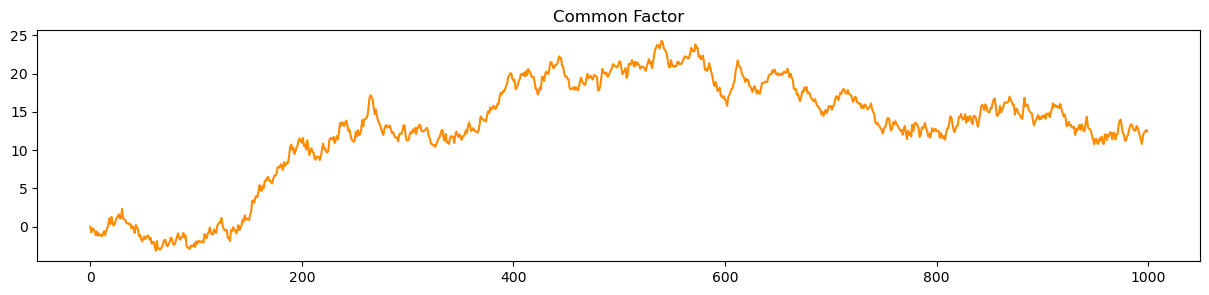

In [3]:
plt.figure(figsize=(15, 3))
plt.plot(z, color = "darkorange")
plt.title("Common Factor")
plt.show()

### Number of Bubble Series 40%

In [5]:
num_of_rw = 0.4

## N = 300

In [7]:
T = 300
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [8]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [9]:
# 1

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

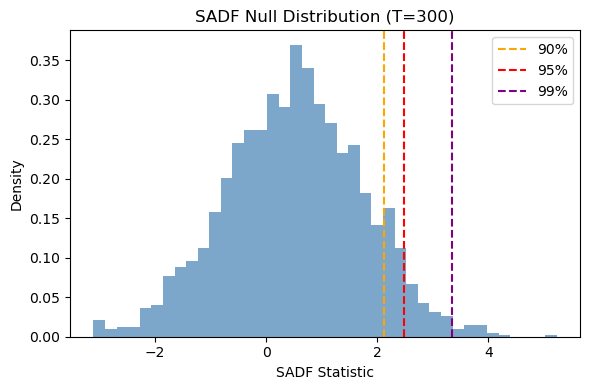

     Critical Value
90%        2.116060
95%        2.481809
99%        3.338790


beta =  [ 0.0593528   0.02860352 -0.0741179   0.02343242  0.07428818  0.12702308
  0.1681097  -0.06974228  0.08802273  0.07835732  0.02080321 -0.11123497
 -0.00466474  0.063701   -0.06181491  0.03194509  0.1422985  -0.05743952
  0.04303231  0.12107162  0.05611381  0.0170766   0.16165556  0.09325555]
alpha =  -0.0301
ADF on residuals  stat = -4.587


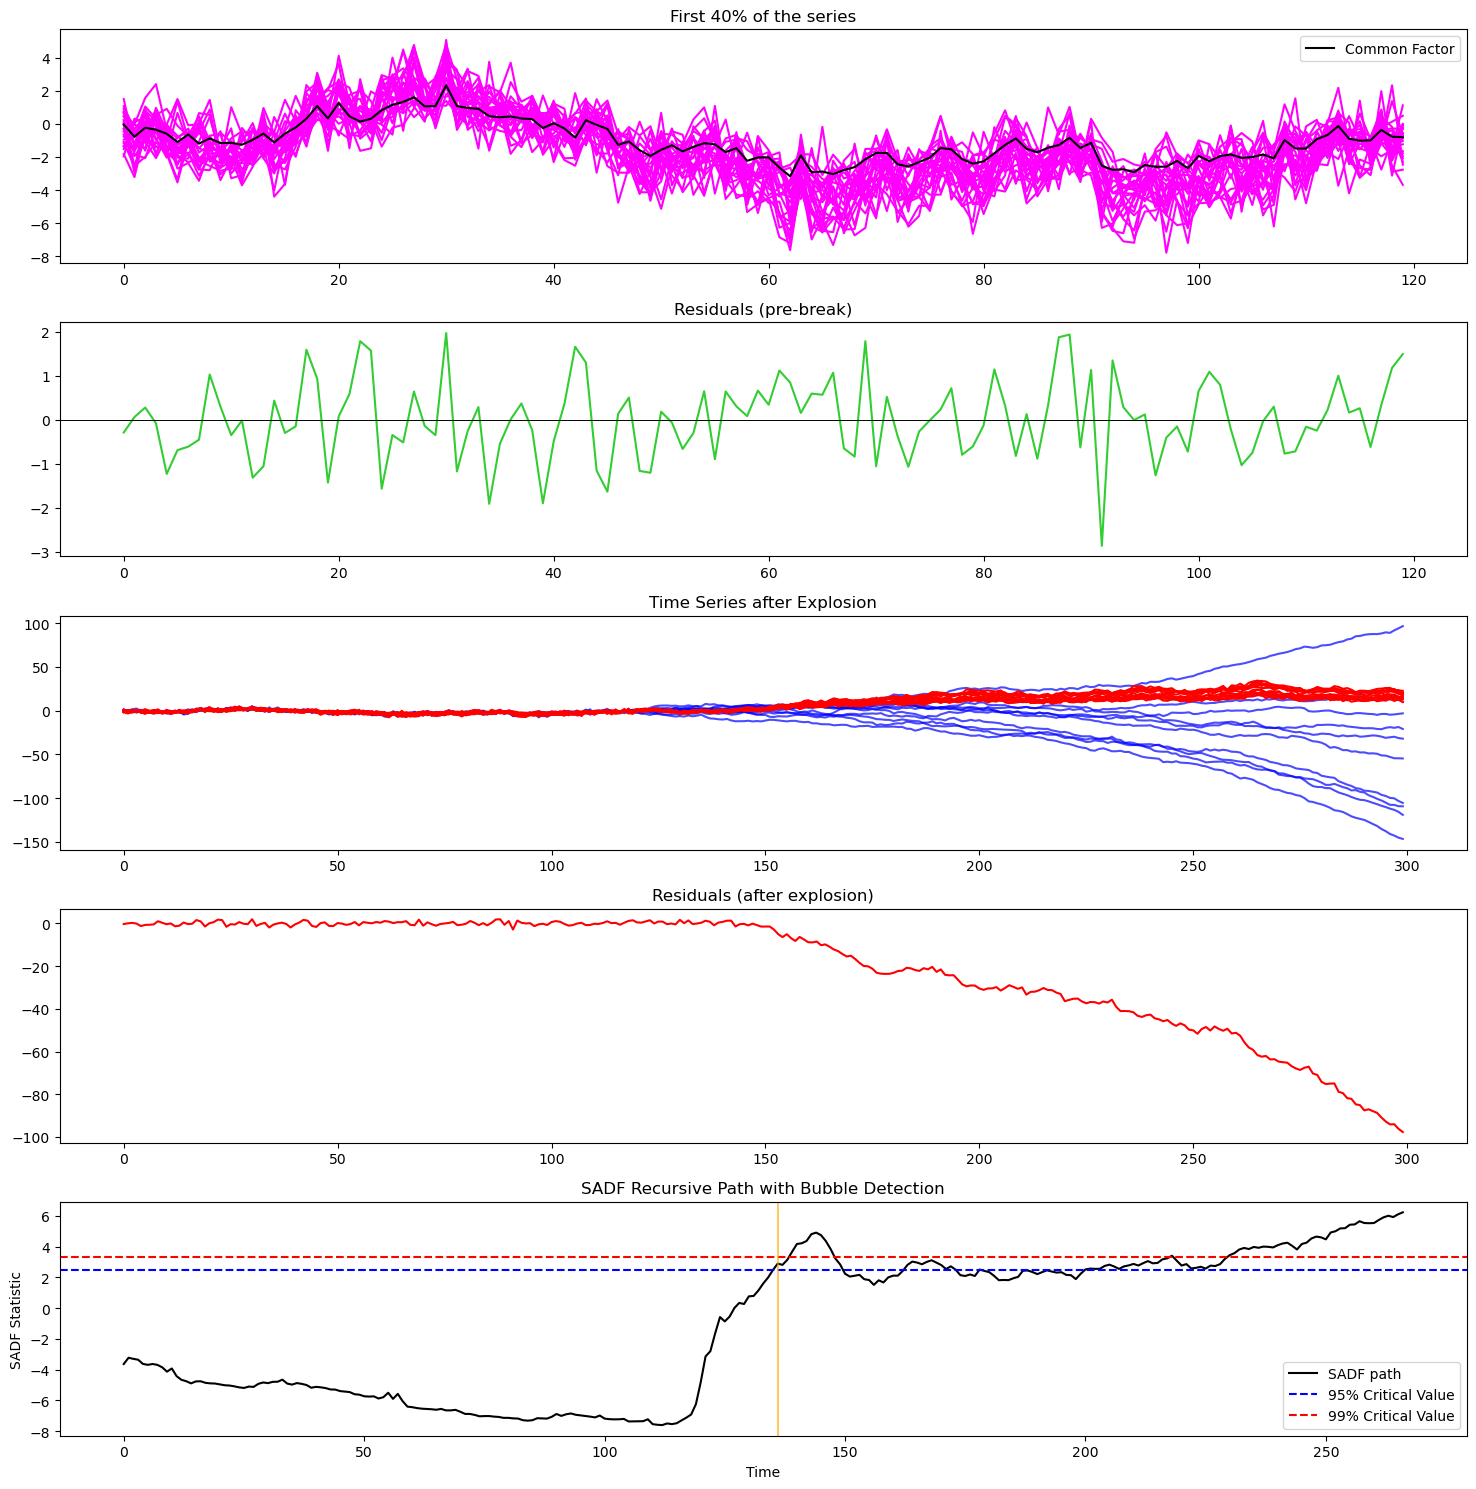

Time series is Explosive. SADF Value is: 6.22

Bubble starts at t=136
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [10]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [11]:
# 2 

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

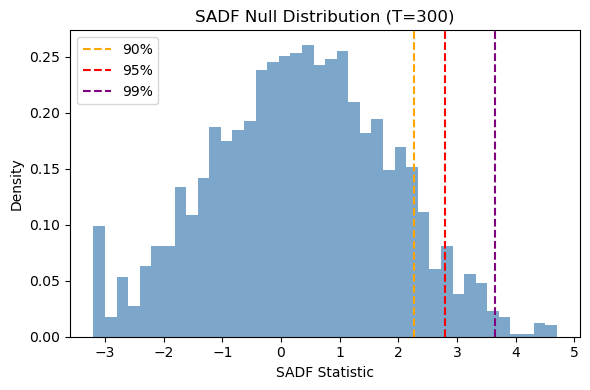

     Critical Value
90%        2.268711
95%        2.802801
99%        3.655834


beta =  [ 0.05107299  0.02248202 -0.03916049  0.02882122  0.13179414  0.02484221
  0.03068472 -0.04564713  0.14815333  0.00045902  0.05421687  0.00158537
 -0.00691008  0.07416685 -0.02364232  0.07058927  0.08629507 -0.03994251
  0.12167447  0.18672797  0.04176751  0.01876802  0.04472248  0.02961446]
alpha =  0.0946
ADF on residuals  stat = -13.452


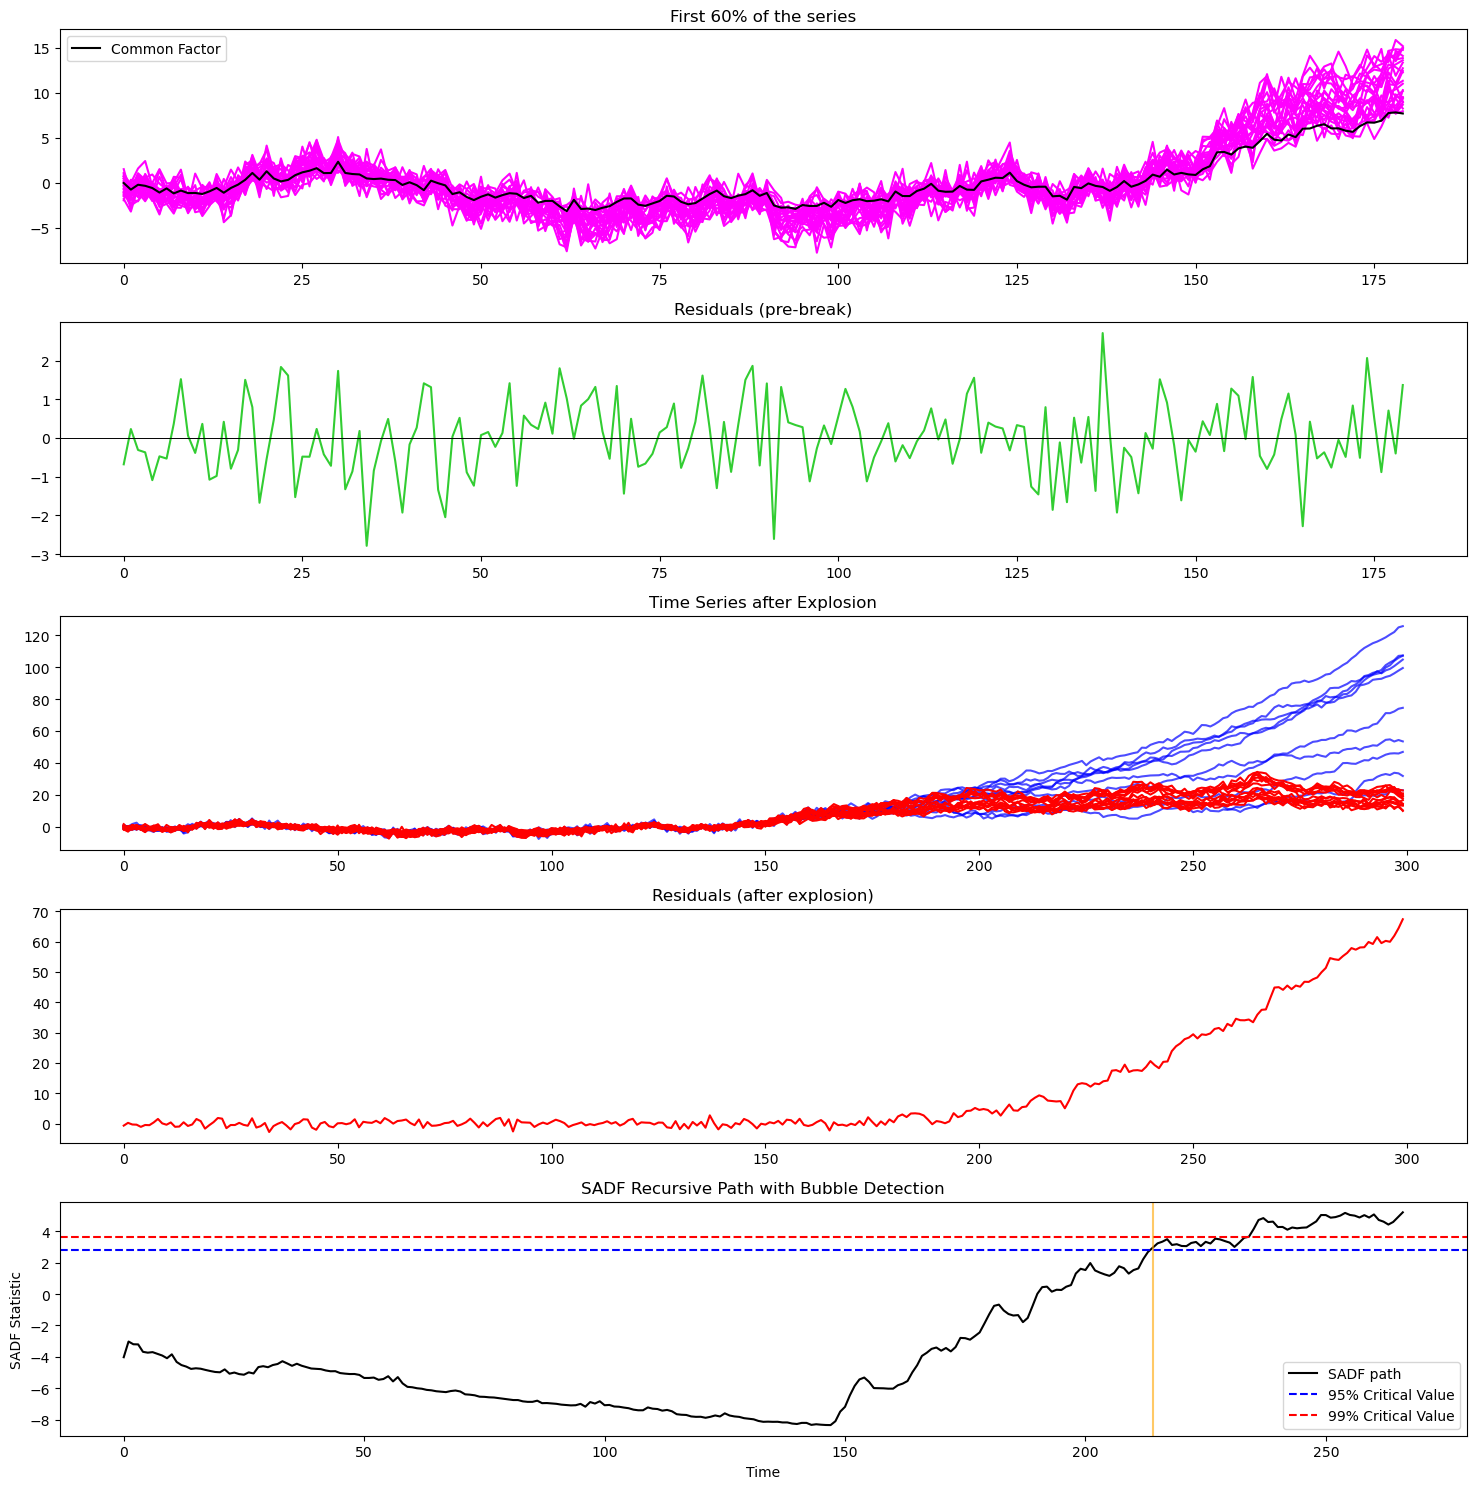

Time series is Explosive. SADF Value is: 5.2

Bubble starts at t=214
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [12]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [13]:
# 3

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

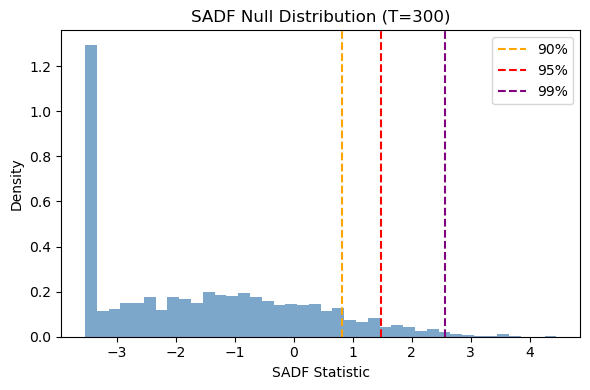

     Critical Value
90%        0.823943
95%        1.484757
99%        2.563222


beta =  [ 0.03726091  0.06459214 -0.06506405  0.05497504  0.12263694  0.00526993
  0.07816013 -0.01810059  0.12019677 -0.02917861  0.00994199  0.05353295
  0.02455635  0.03756703 -0.02923848  0.10352386  0.10441478 -0.05412034
  0.12732958  0.19888524  0.08006635 -0.03256083  0.05396992 -0.0205292 ]
alpha =  0.093
ADF on residuals  stat = -16.005


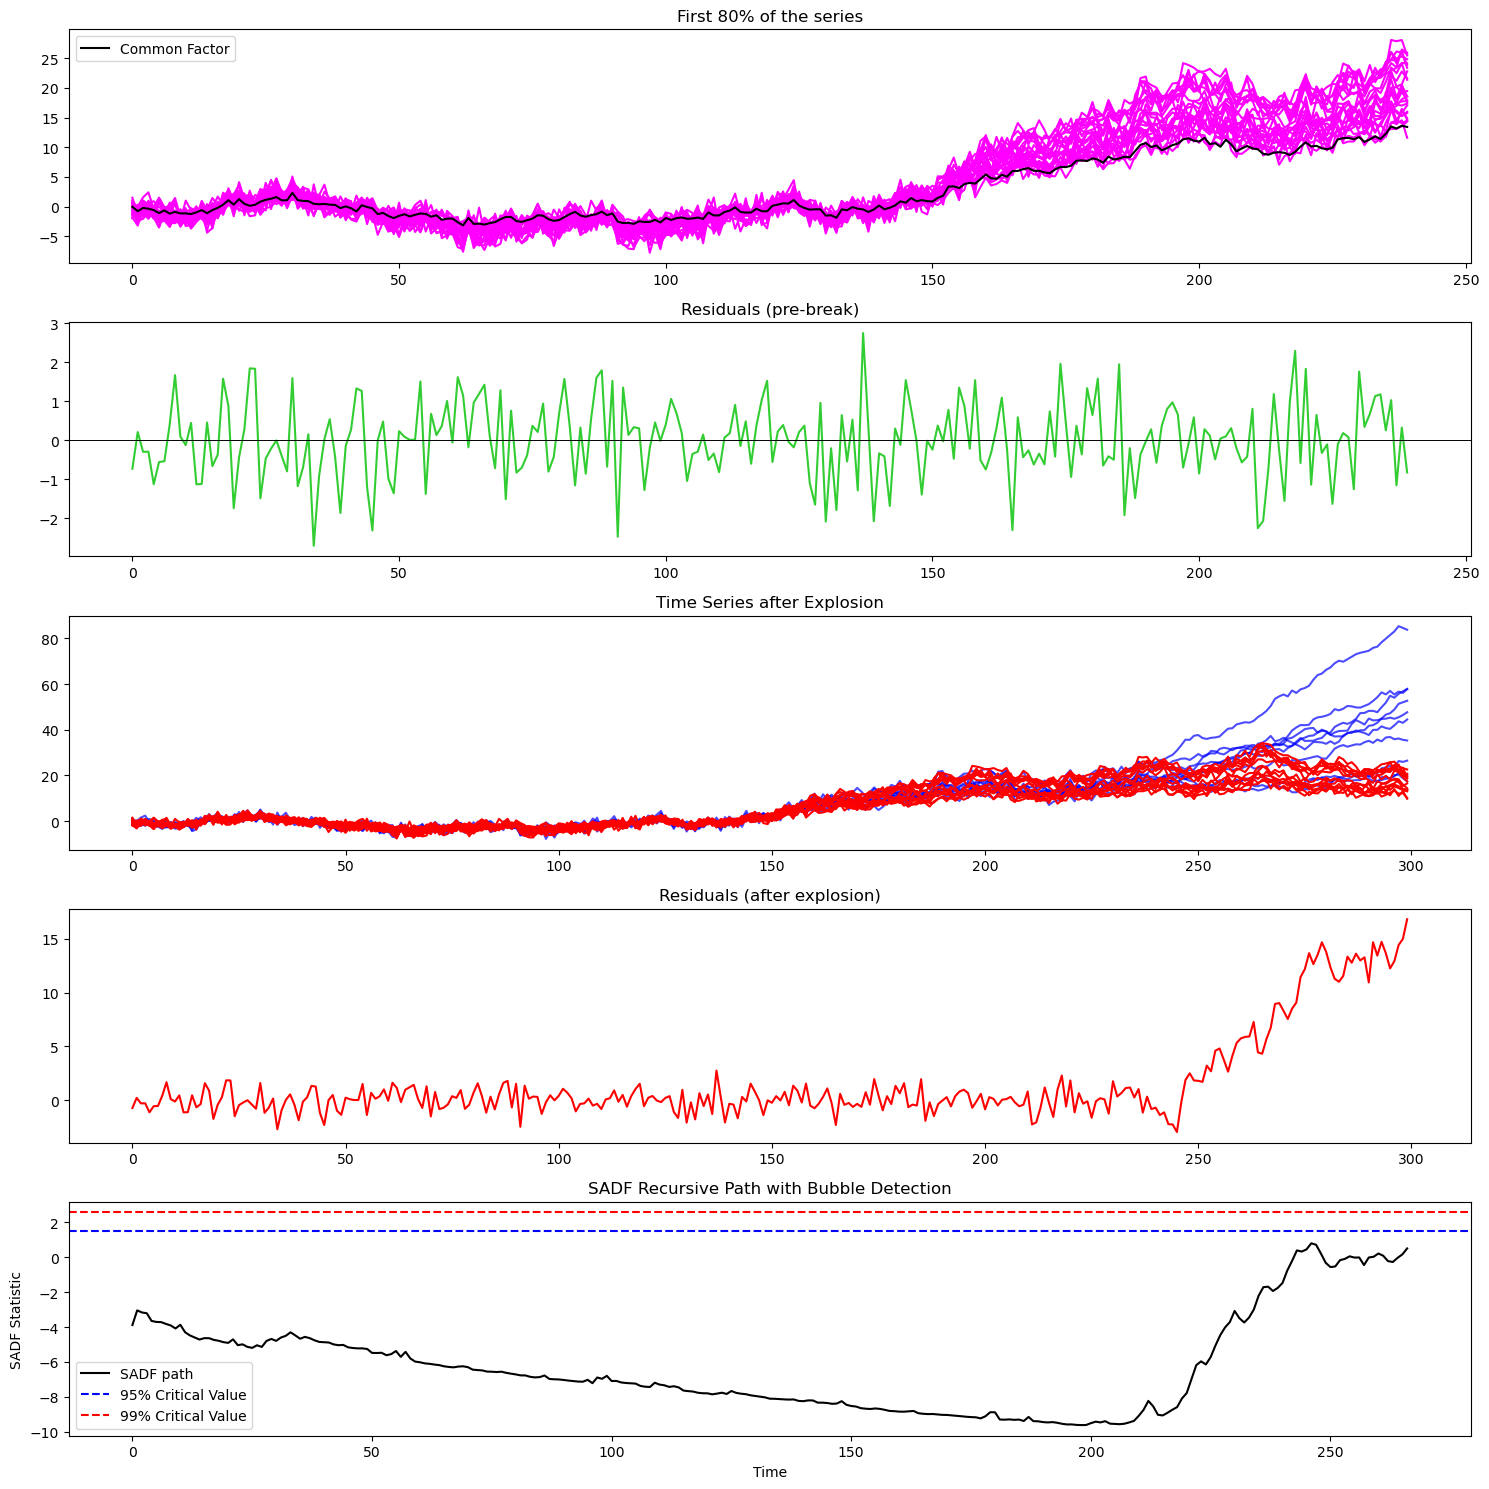

Time series is Non Explosive. SADF Value is: 0.79

Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [14]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 500

In [16]:
T = 500
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [17]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [18]:
# 34

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

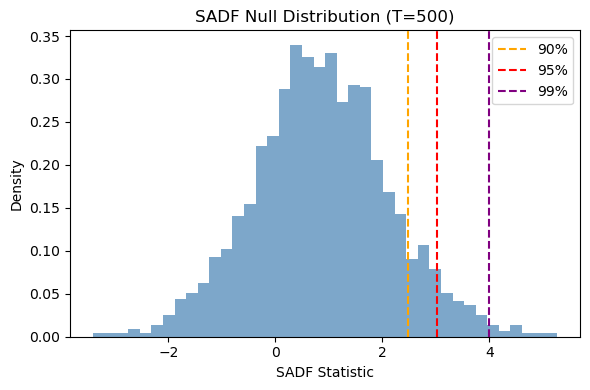

     Critical Value
90%        2.478966
95%        3.011188
99%        3.986751


beta =  [ 0.02982093  0.02886061 -0.04607787  0.04440953  0.1272613  -0.03053078
  0.08072452 -0.03253288  0.15224977 -0.00723917  0.03598627  0.01292386
  0.01238836  0.02716934 -0.0243334   0.10120712  0.0995509  -0.02974639
  0.15279876  0.14718262  0.07601878 -0.01374267  0.04534481  0.04588692]
alpha =  0.1096
ADF on residuals  stat = -14.439


In [ ]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [ ]:
# 35

In [ ]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [ ]:
# 36

In [ ]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 800

In [ ]:
T = 800
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [ ]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [ ]:
# 67

In [ ]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [ ]:
# 68

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

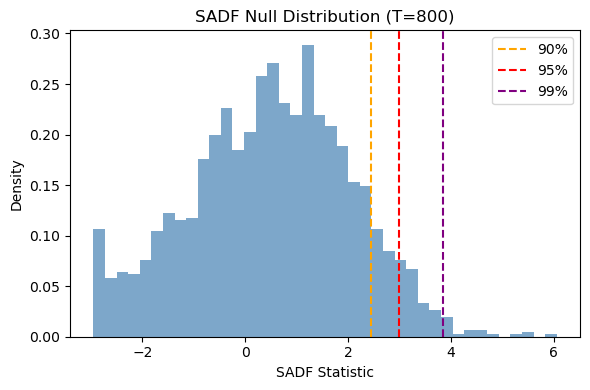

     Critical Value
90%        2.448364
95%        2.994216
99%        3.839242


beta =  [ 0.01647116  0.0811813   0.02849015  0.06502956  0.06427577 -0.00508109
  0.05272805  0.10364216  0.07381454  0.00327075  0.02364881  0.0274456
 -0.00772555 -0.00796613  0.00798962  0.05132353  0.10575038 -0.05636723
  0.10686955  0.12838079  0.08865787  0.01166697  0.05953157 -0.01612798]
alpha =  0.0753
ADF on residuals  stat = -23.472


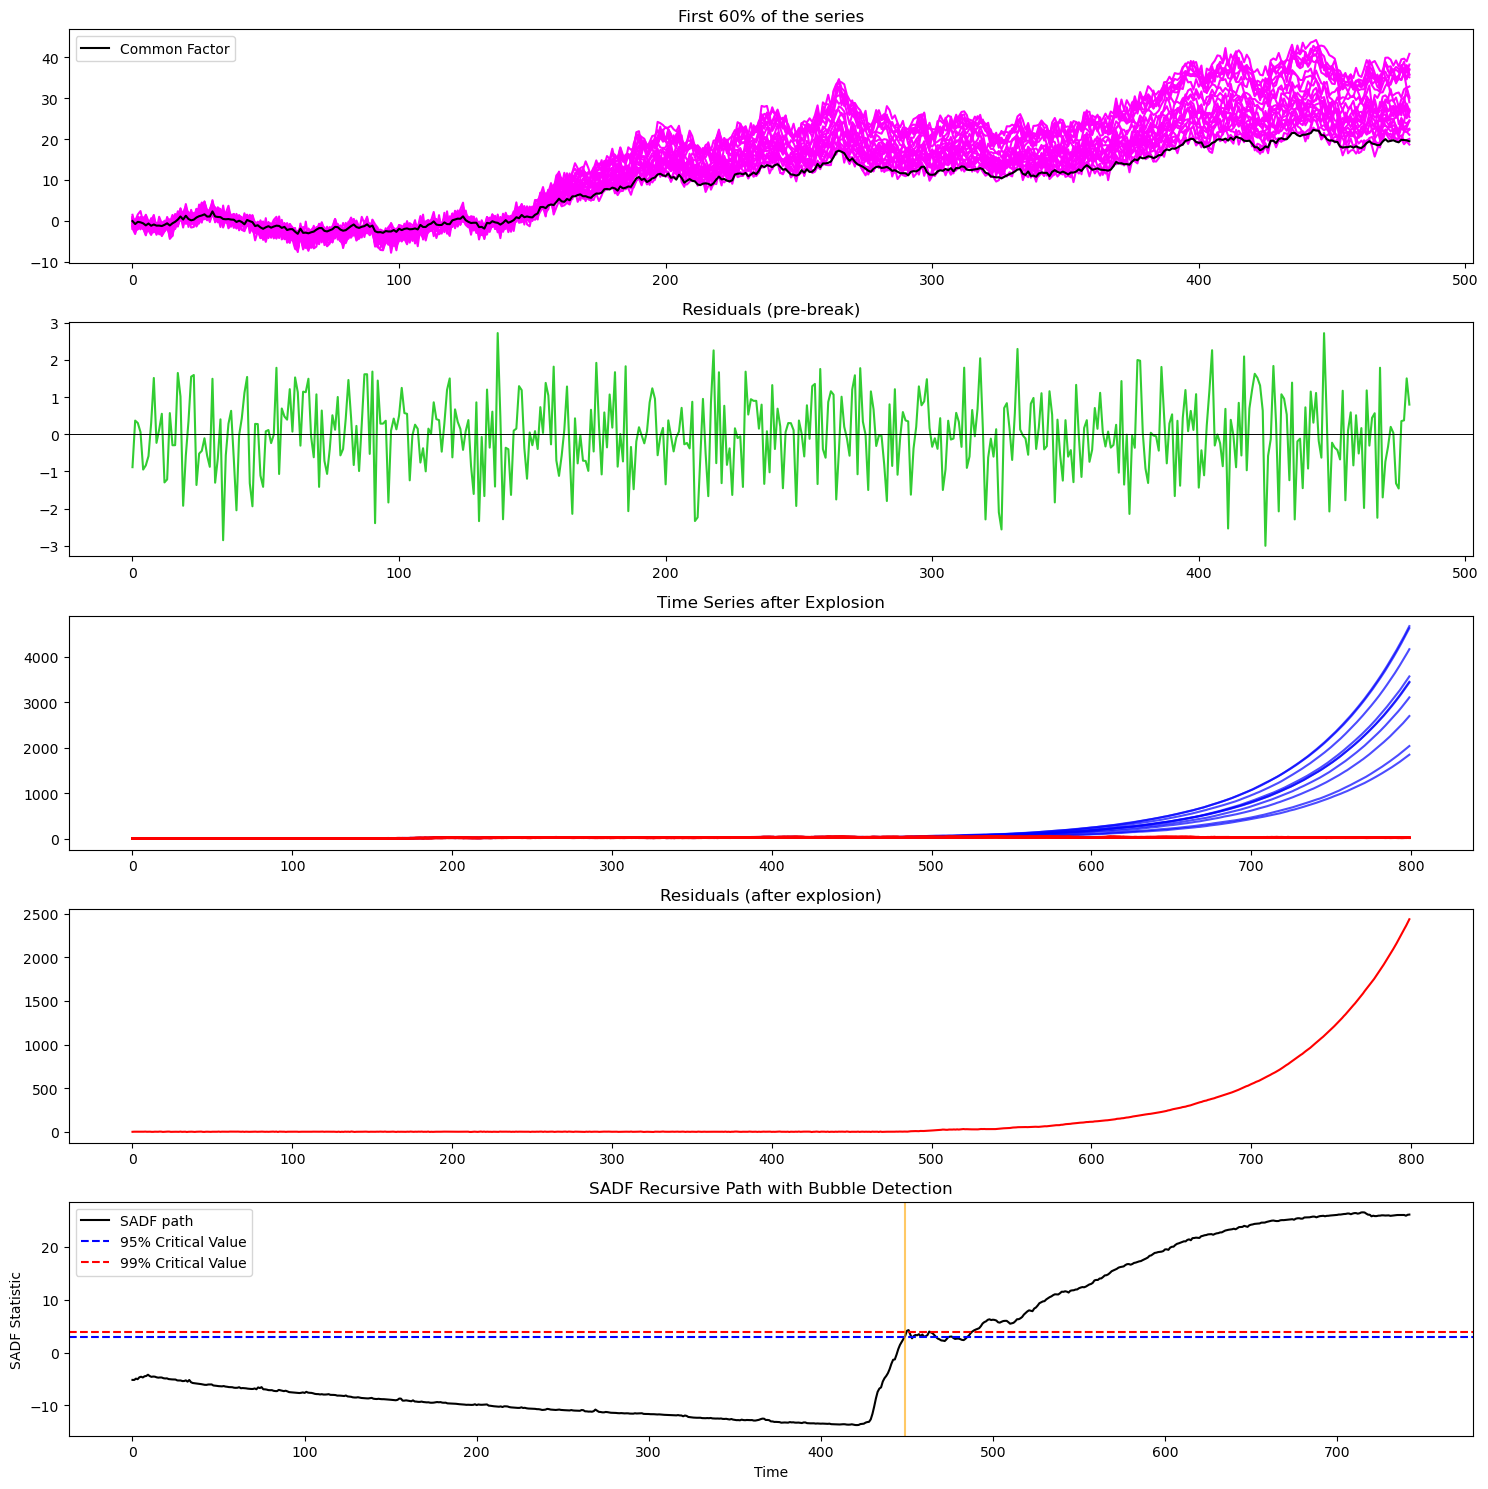

Time series is Explosive. SADF Value is: 26.55

Bubble starts at t=449
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [30]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [31]:
# 69

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

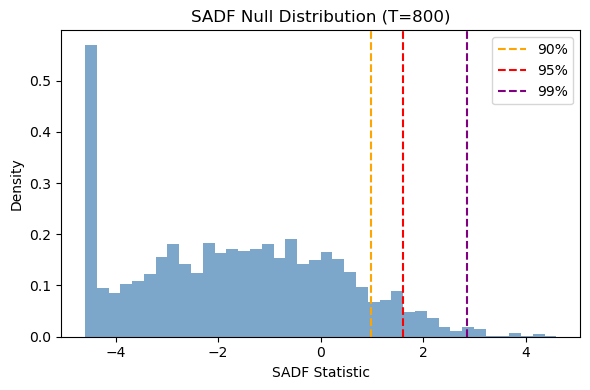

     Critical Value
90%        0.989272
95%        1.613739
99%        2.864989


beta =  [ 0.02743914  0.10493521  0.04077929  0.06777947  0.05943862  0.01263494
  0.03781343  0.08315703  0.07578736  0.01237333  0.04805391  0.01998375
  0.02595616  0.00260597 -0.01692988  0.06296514  0.1072616  -0.06386828
  0.08763918  0.11735427  0.06466077 -0.00376009  0.02931752  0.00274129]
alpha =  0.0806
ADF on residuals  stat = -26.967


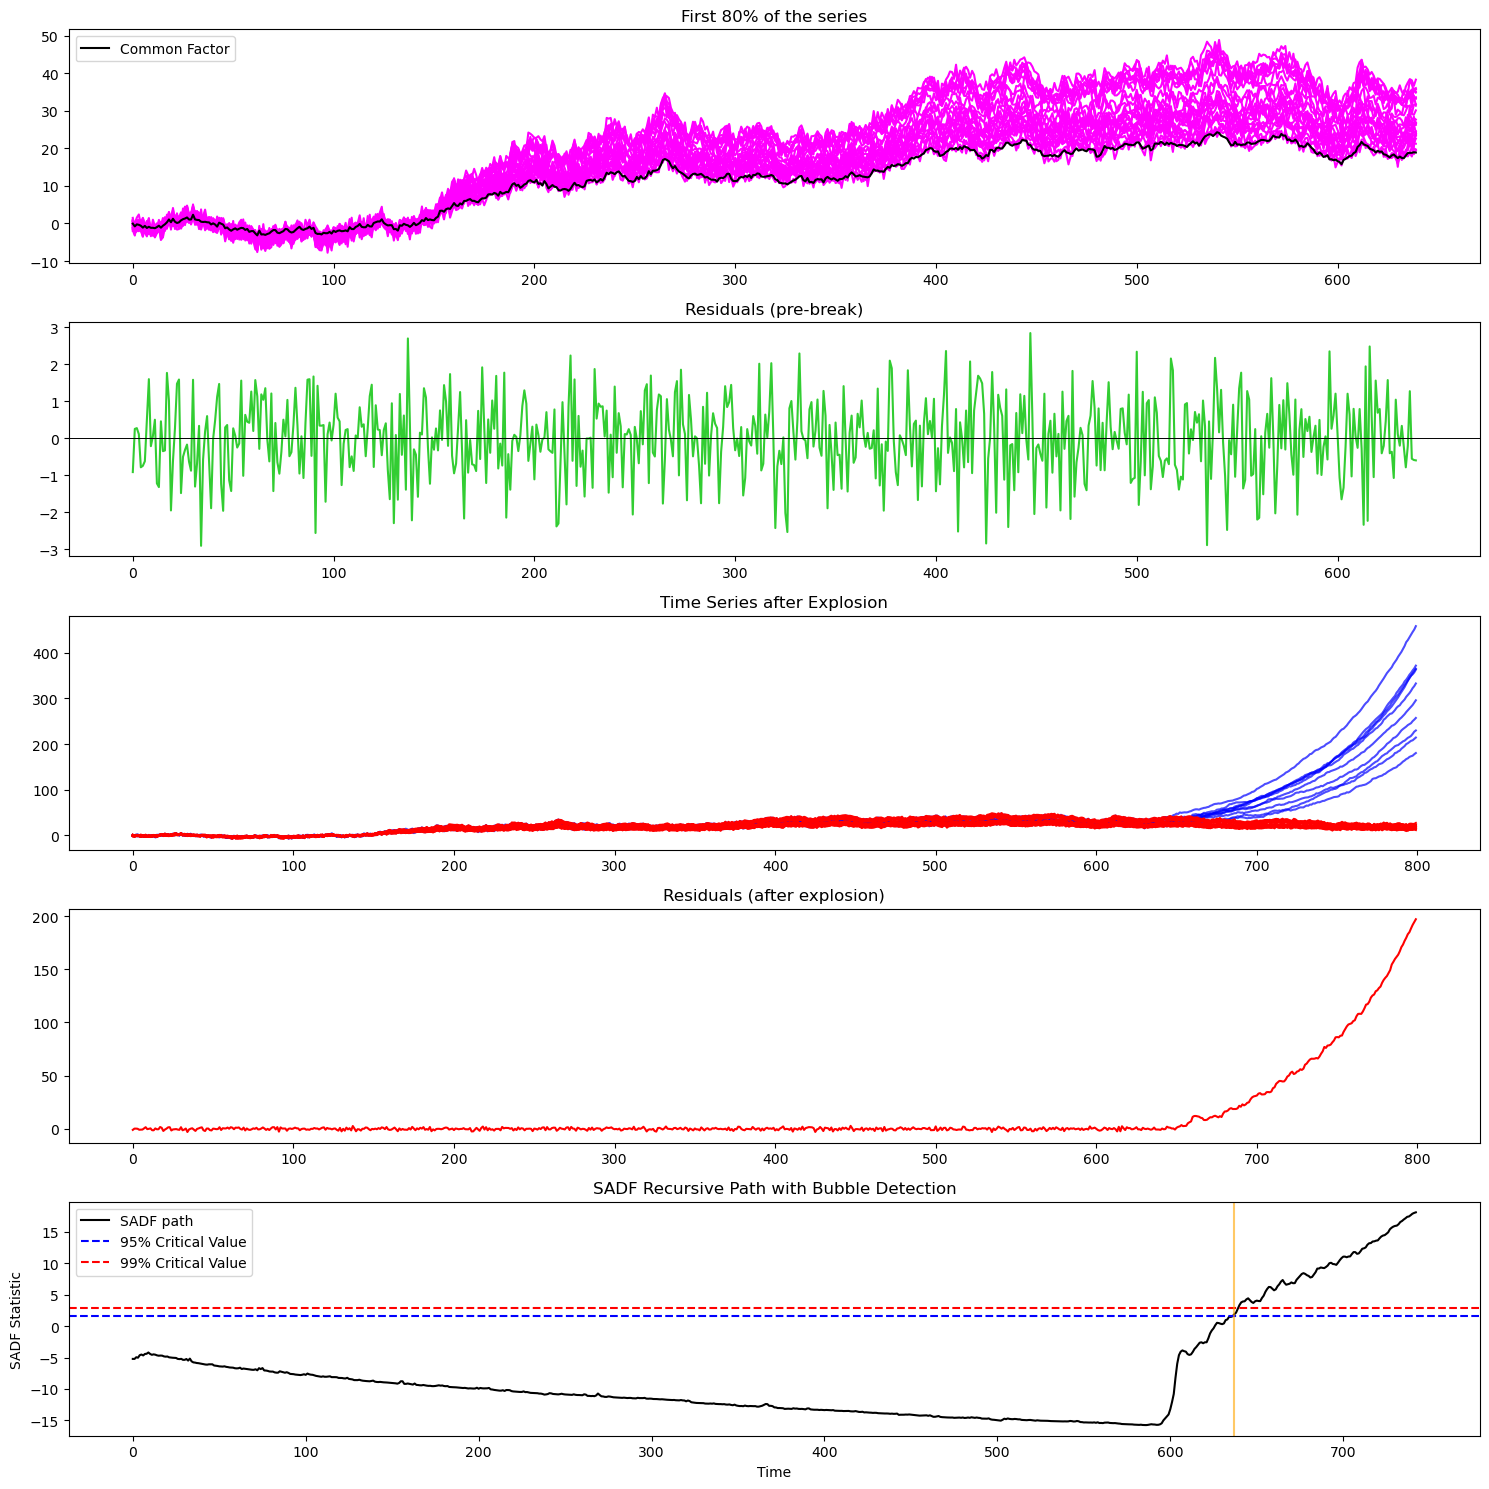

Time series is Explosive. SADF Value is: 18.1

Bubble starts at t=637
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [32]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 1000

In [34]:
T = 1000
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [35]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [36]:
# 100

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

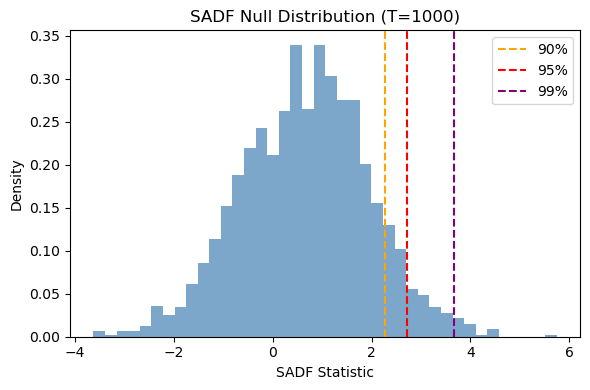

     Critical Value
90%        2.269619
95%        2.707101
99%        3.666607


beta =  [ 0.03183547  0.08366187 -0.01120039  0.05410067  0.06855996  0.00848357
  0.06480128  0.07690572  0.10113649 -0.00715644 -0.01560493  0.01096492
 -0.00612209  0.01076161 -0.01444325  0.06628771  0.15212065 -0.07139145
  0.11253058  0.1587408   0.12573623 -0.02956765  0.09288288  0.00593676]
alpha =  0.0719
ADF on residuals  stat = -20.791


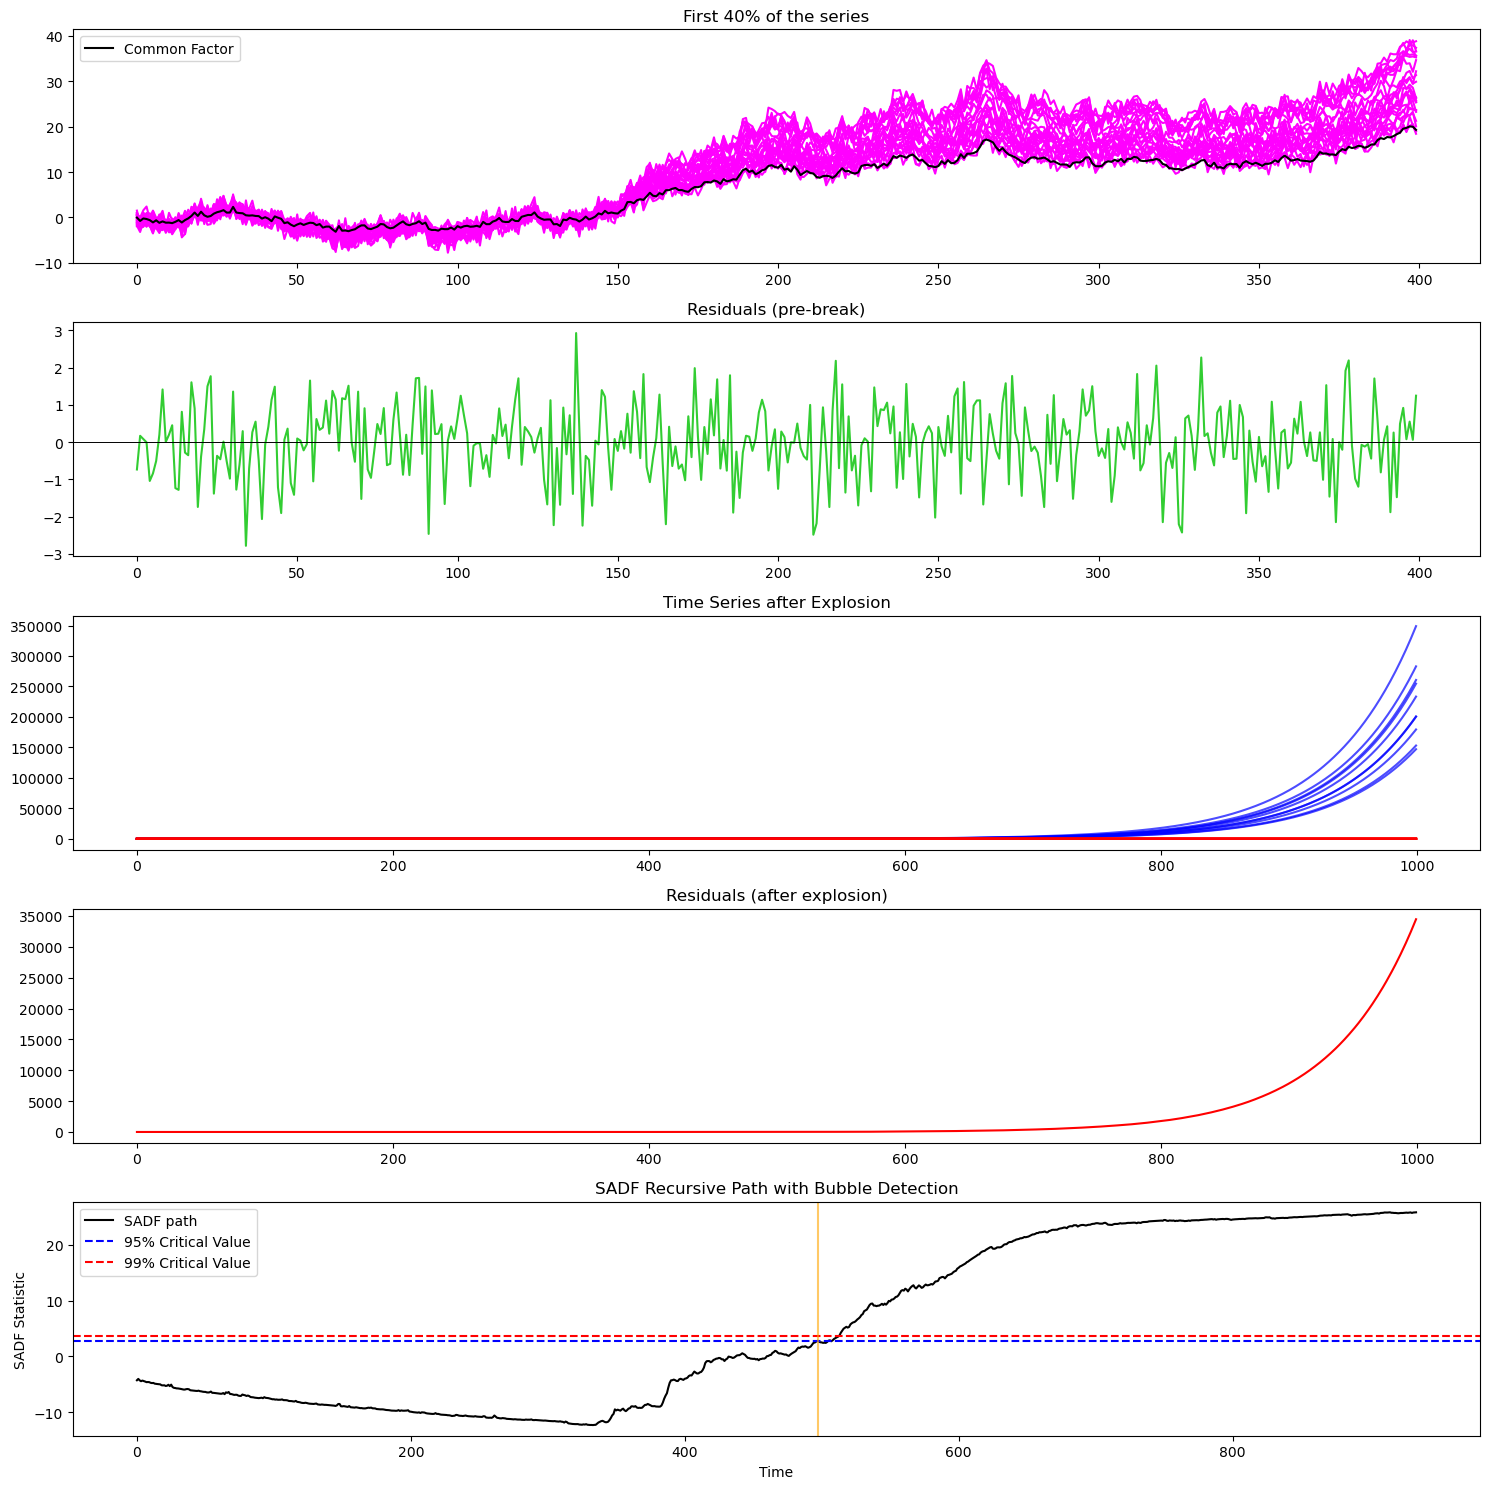

Time series is Explosive. SADF Value is: 25.82

Bubble starts at t=497
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [37]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [38]:
# 101

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

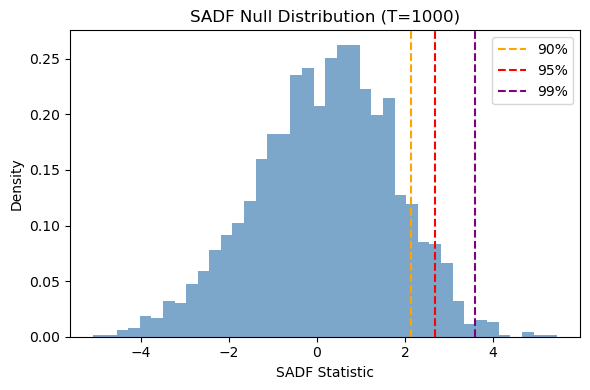

     Critical Value
90%        2.139755
95%        2.676641
99%        3.587433


beta =  [ 0.03091912  0.10115154  0.03125589  0.05952047  0.06448745  0.01294609
  0.04670838  0.06803679  0.07641561  0.00976331  0.04660952  0.03582969
  0.01071069 -0.00404352 -0.00464319  0.06706342  0.11601034 -0.08476375
  0.09428142  0.12216701  0.09279526 -0.00514666  0.02974349  0.00202224]
alpha =  0.0837
ADF on residuals  stat = -25.801


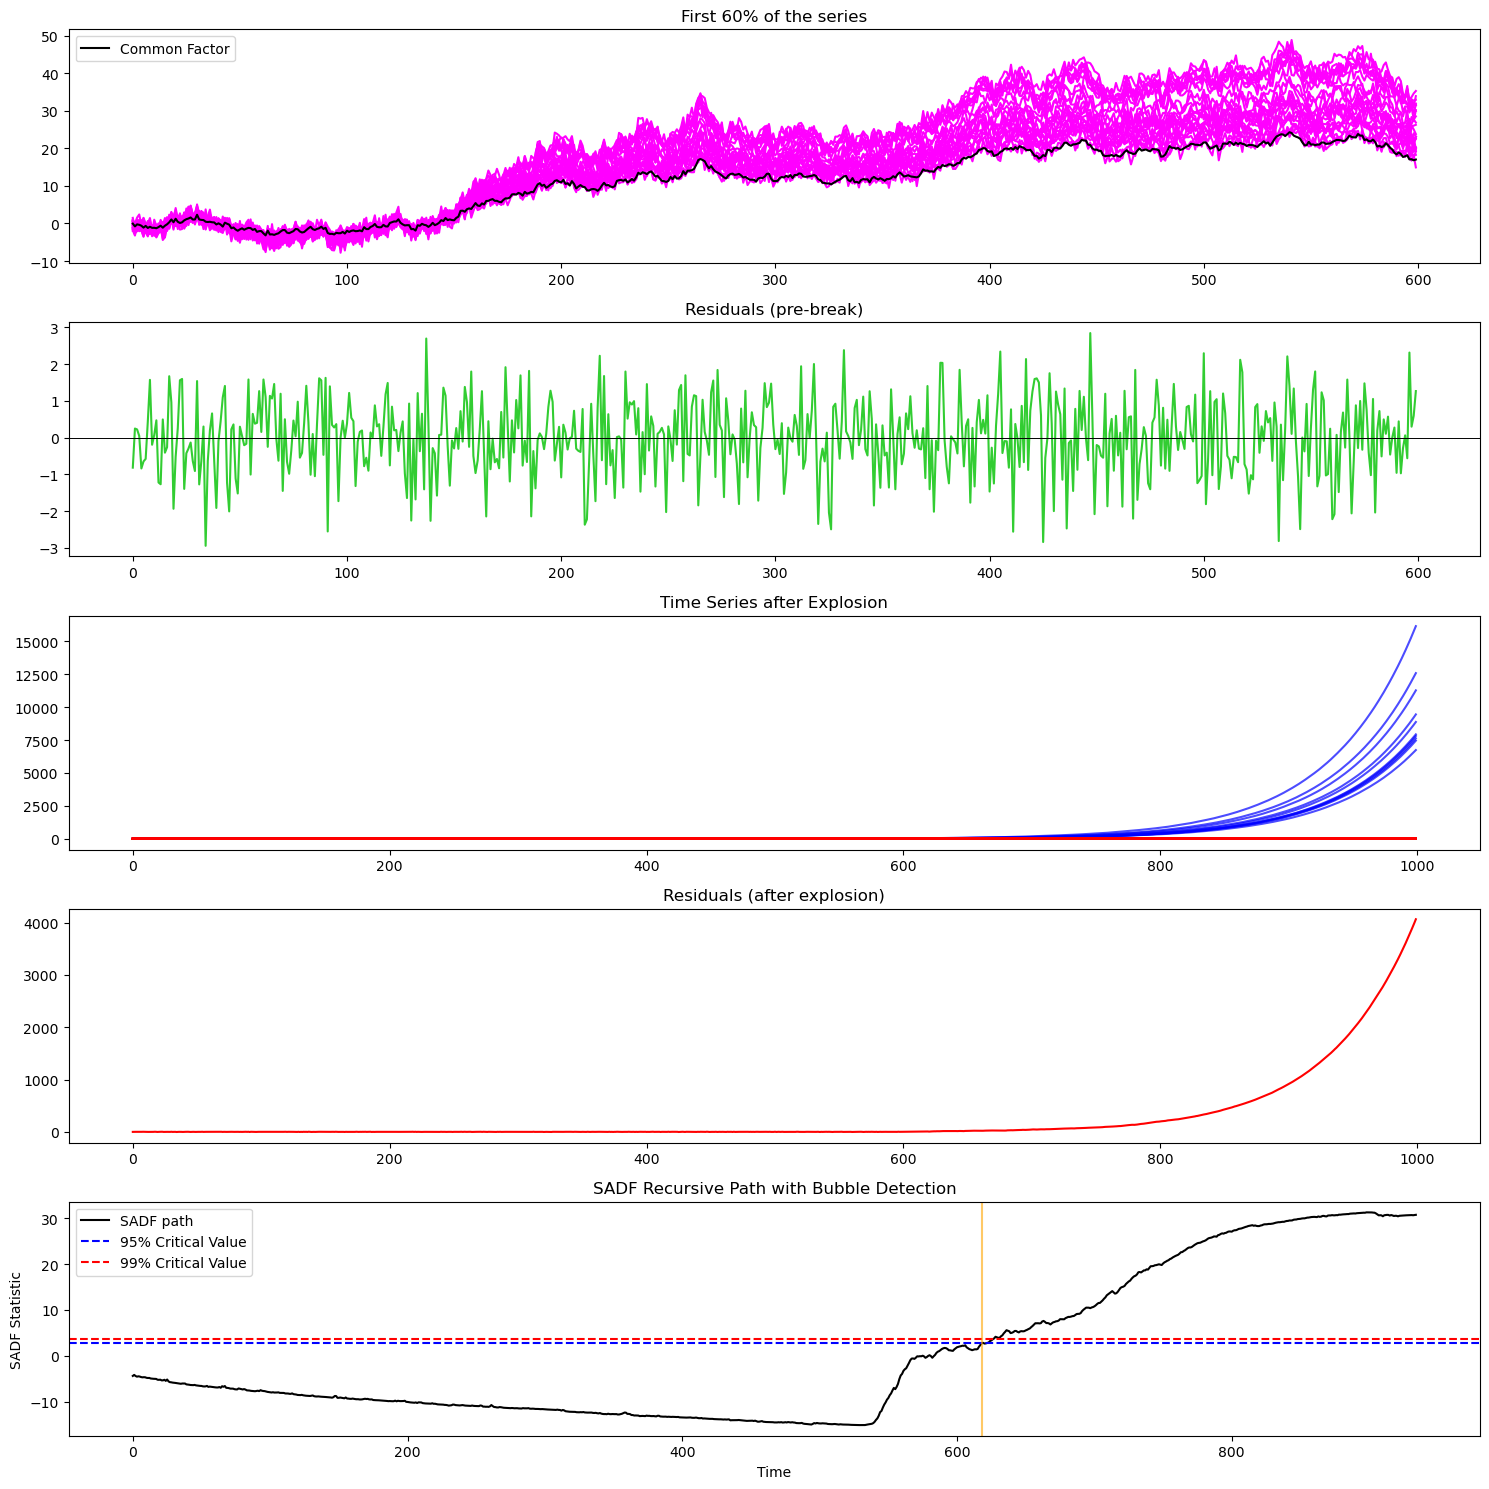

Time series is Explosive. SADF Value is: 31.28

Bubble starts at t=618
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [39]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [40]:
# 102

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

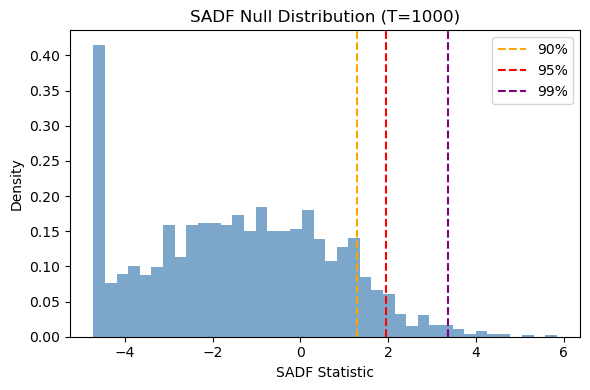

     Critical Value
90%        1.288153
95%        1.950334
99%        3.363193


beta =  [ 0.02756299  0.08168911  0.04570252  0.0851056   0.06088119  0.0122832
  0.03116893  0.0723169   0.08447467  0.02783306  0.03935434  0.02113454
  0.04262339  0.00332888 -0.011474    0.0533636   0.10508457 -0.06624295
  0.08103359  0.11407254  0.03020949  0.0117946   0.02881386  0.00899272]
alpha =  0.076
ADF on residuals  stat = -30.049


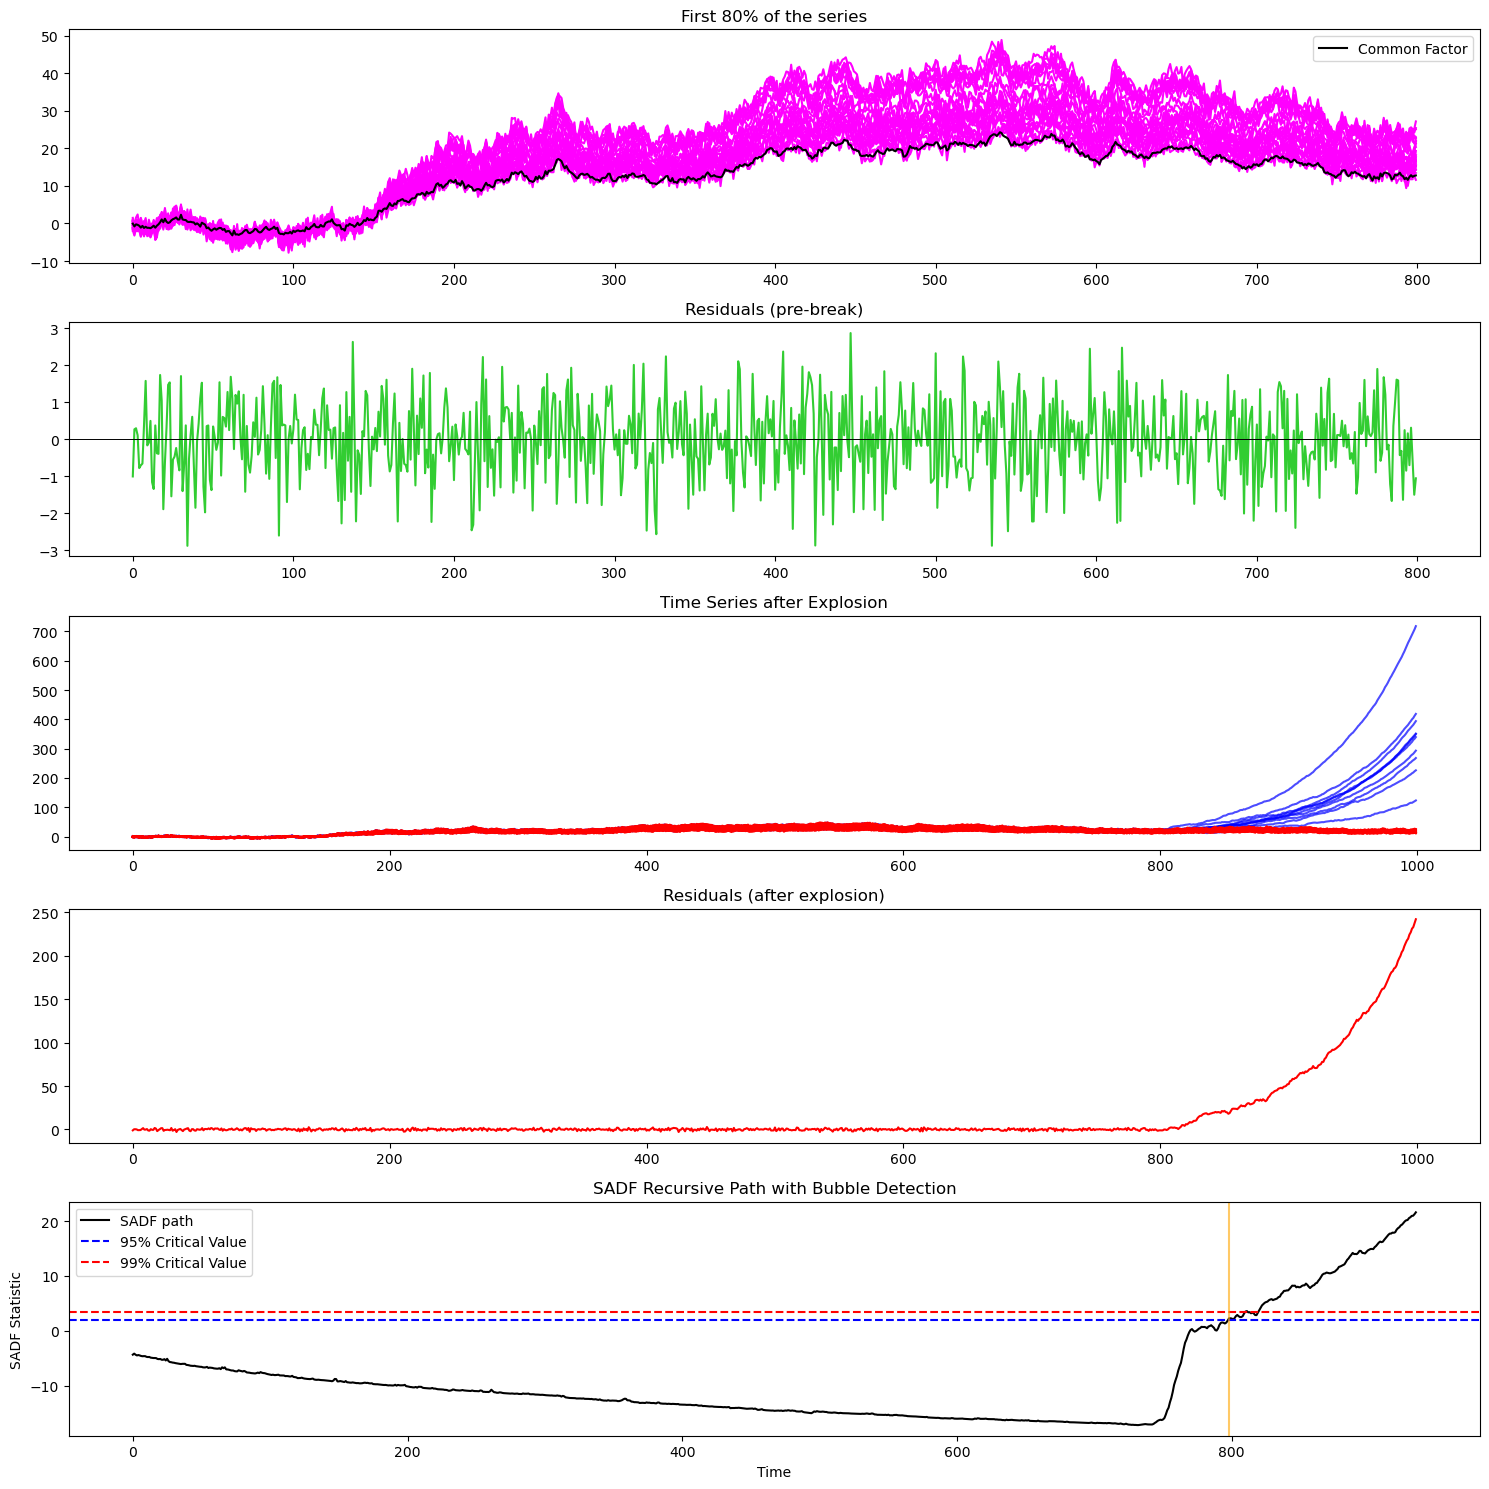

Time series is Explosive. SADF Value is: 21.59

Bubble starts at t=798
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [41]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

### Number of Bubble Series 60%

In [43]:
num_of_rw = 0.6

## N = 300

In [45]:
T = 300
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [46]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

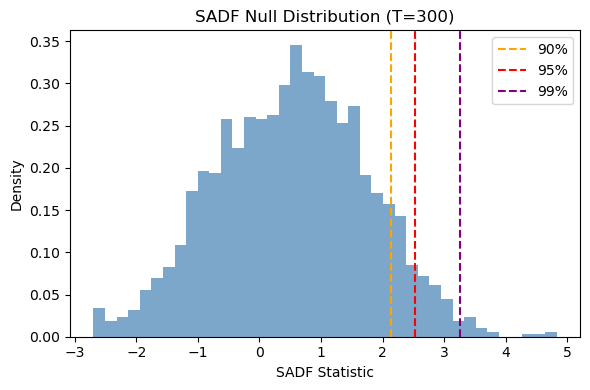

     Critical Value
90%        2.134000
95%        2.531359
99%        3.262454


beta =  [ 0.0593528   0.02860352 -0.0741179   0.02343242  0.07428818  0.12702308
  0.1681097  -0.06974228  0.08802273  0.07835732  0.02080321 -0.11123497
 -0.00466474  0.063701   -0.06181491  0.03194509  0.1422985  -0.05743952
  0.04303231  0.12107162  0.05611381  0.0170766   0.16165556  0.09325555]
alpha =  -0.0301
ADF on residuals  stat = -4.587


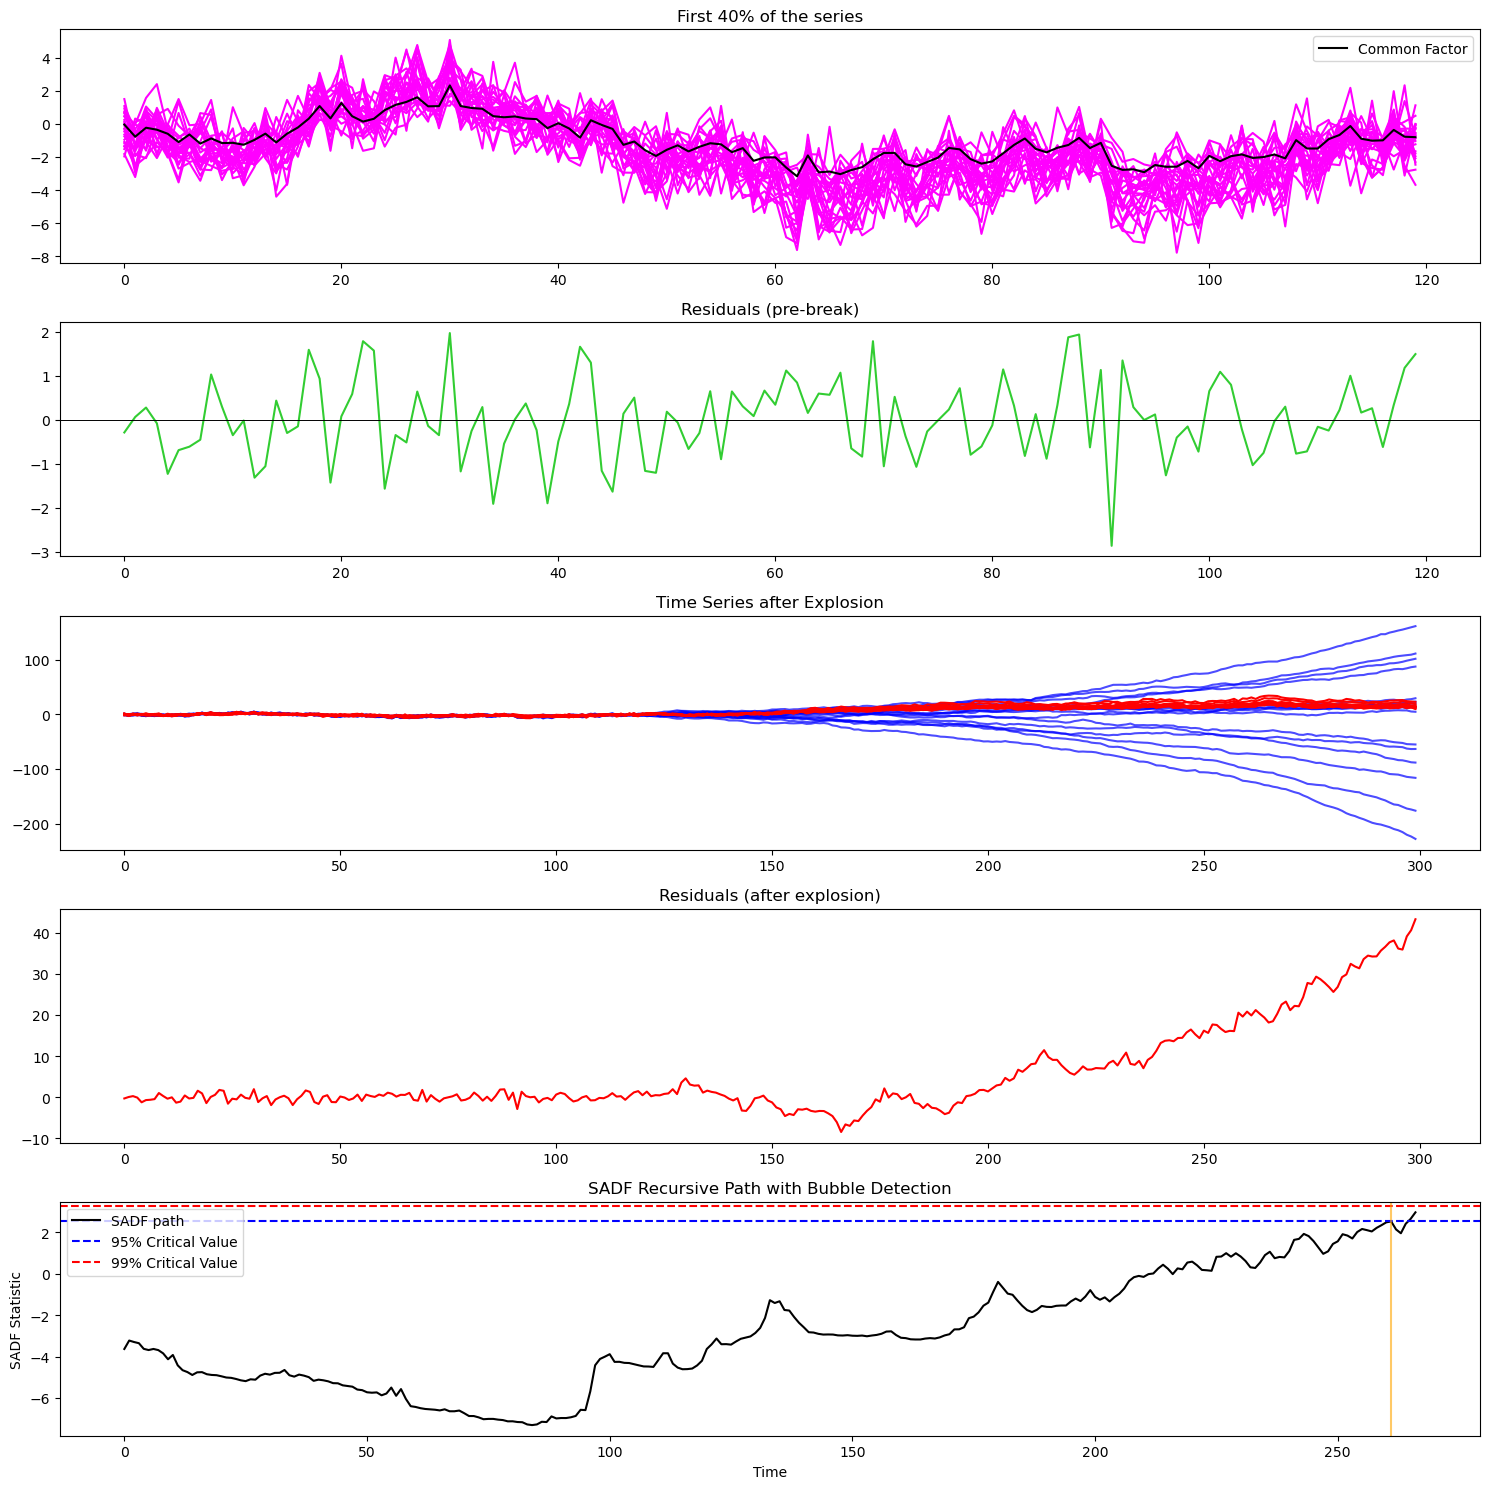

Time series is Explosive. SADF Value is: 2.97

Bubble starts at t=261
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [47]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

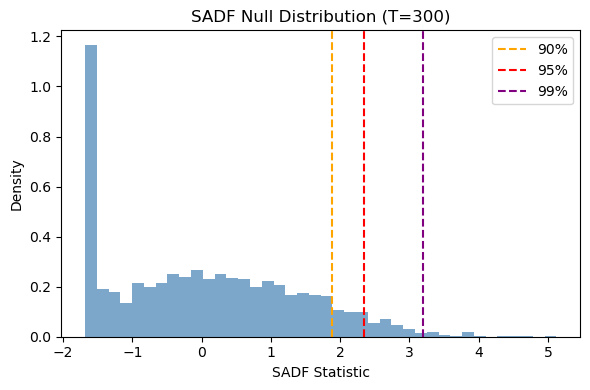

     Critical Value
90%        1.881223
95%        2.350862
99%        3.189690


beta =  [ 0.05107299  0.02248202 -0.03916049  0.02882122  0.13179414  0.02484221
  0.03068472 -0.04564713  0.14815333  0.00045902  0.05421687  0.00158537
 -0.00691008  0.07416685 -0.02364232  0.07058927  0.08629507 -0.03994251
  0.12167447  0.18672797  0.04176751  0.01876802  0.04472248  0.02961446]
alpha =  0.0946
ADF on residuals  stat = -13.452


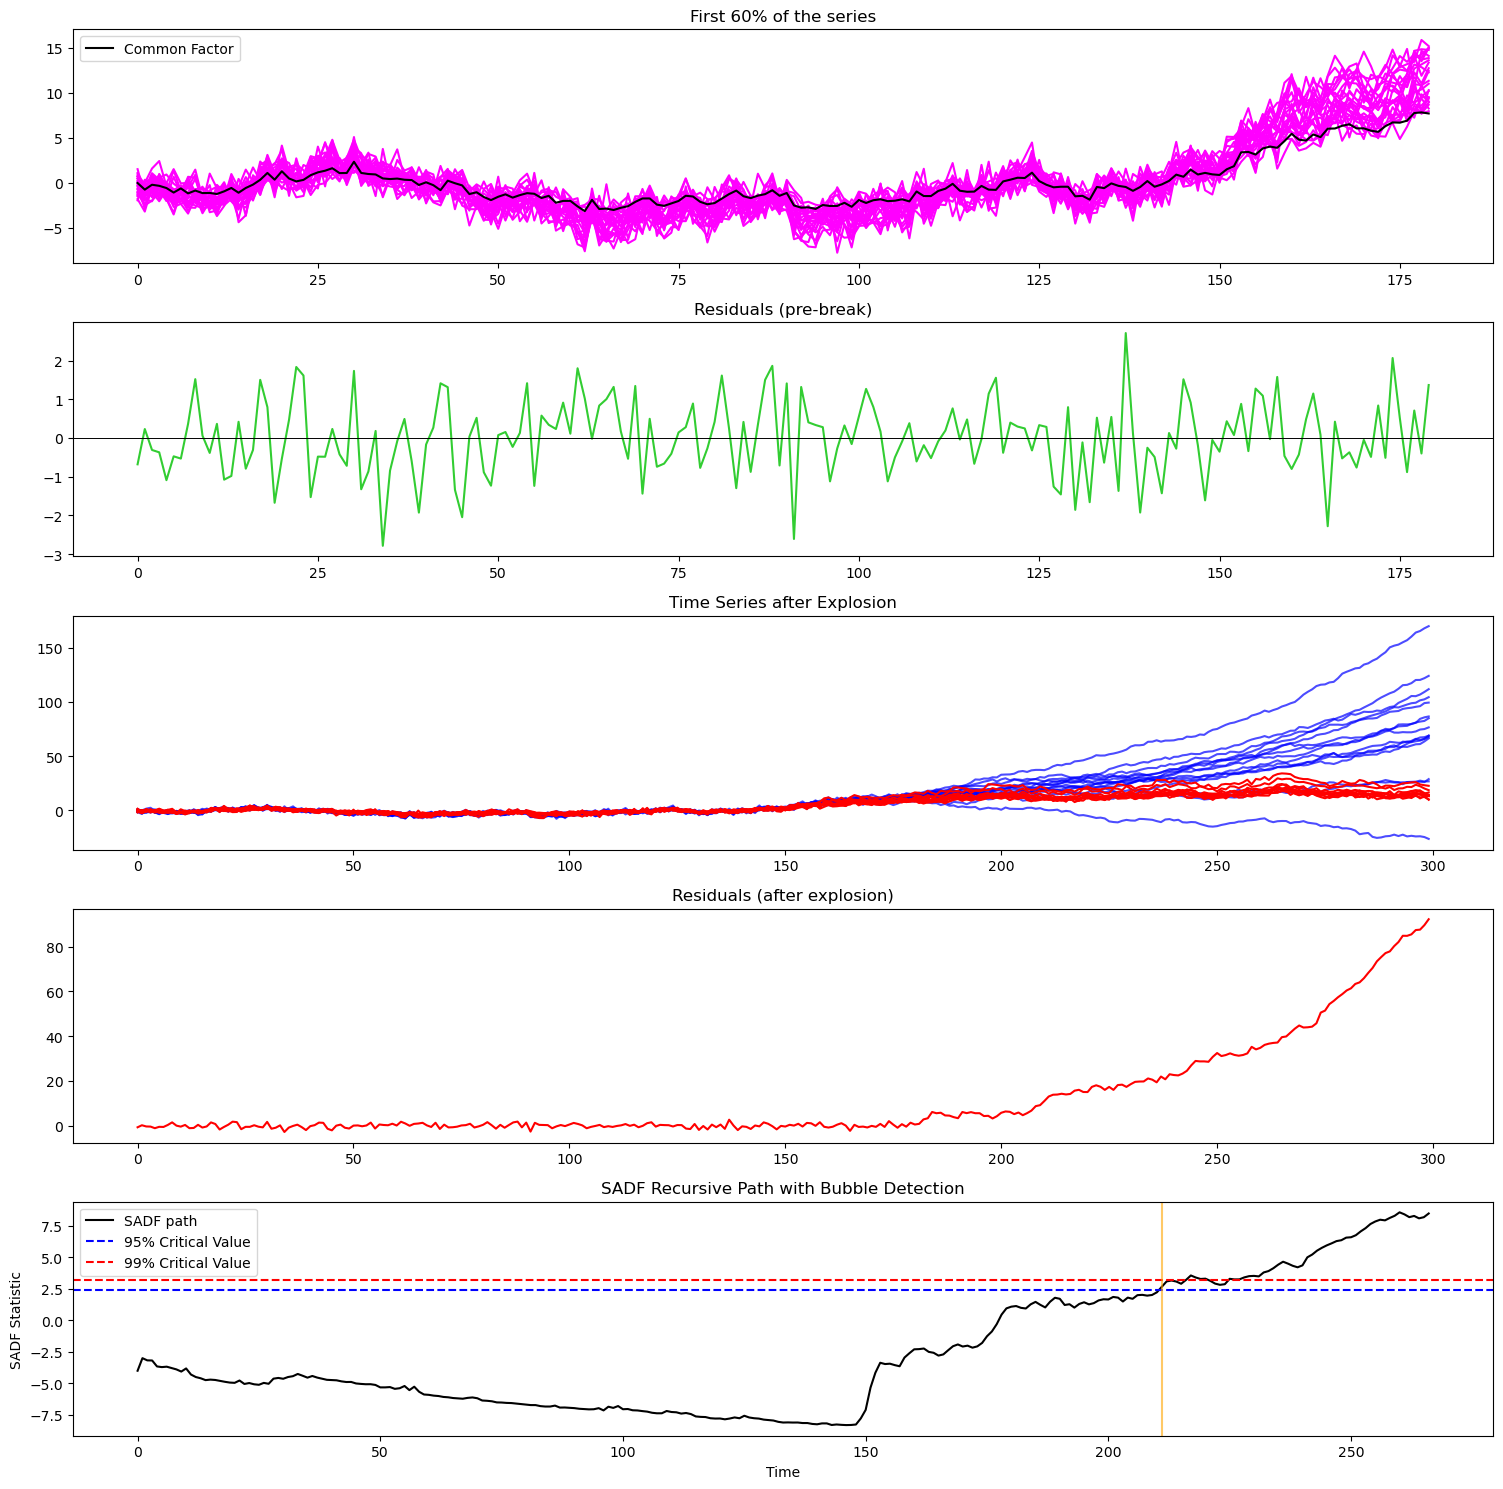

Time series is Explosive. SADF Value is: 8.55

Bubble starts at t=211
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [48]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

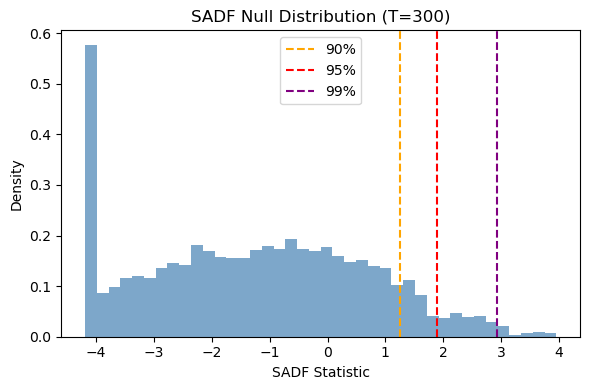

     Critical Value
90%        1.247950
95%        1.885898
99%        2.932156


beta =  [ 0.03726091  0.06459214 -0.06506405  0.05497504  0.12263694  0.00526993
  0.07816013 -0.01810059  0.12019677 -0.02917861  0.00994199  0.05353295
  0.02455635  0.03756703 -0.02923848  0.10352386  0.10441478 -0.05412034
  0.12732958  0.19888524  0.08006635 -0.03256083  0.05396992 -0.0205292 ]
alpha =  0.093
ADF on residuals  stat = -16.005


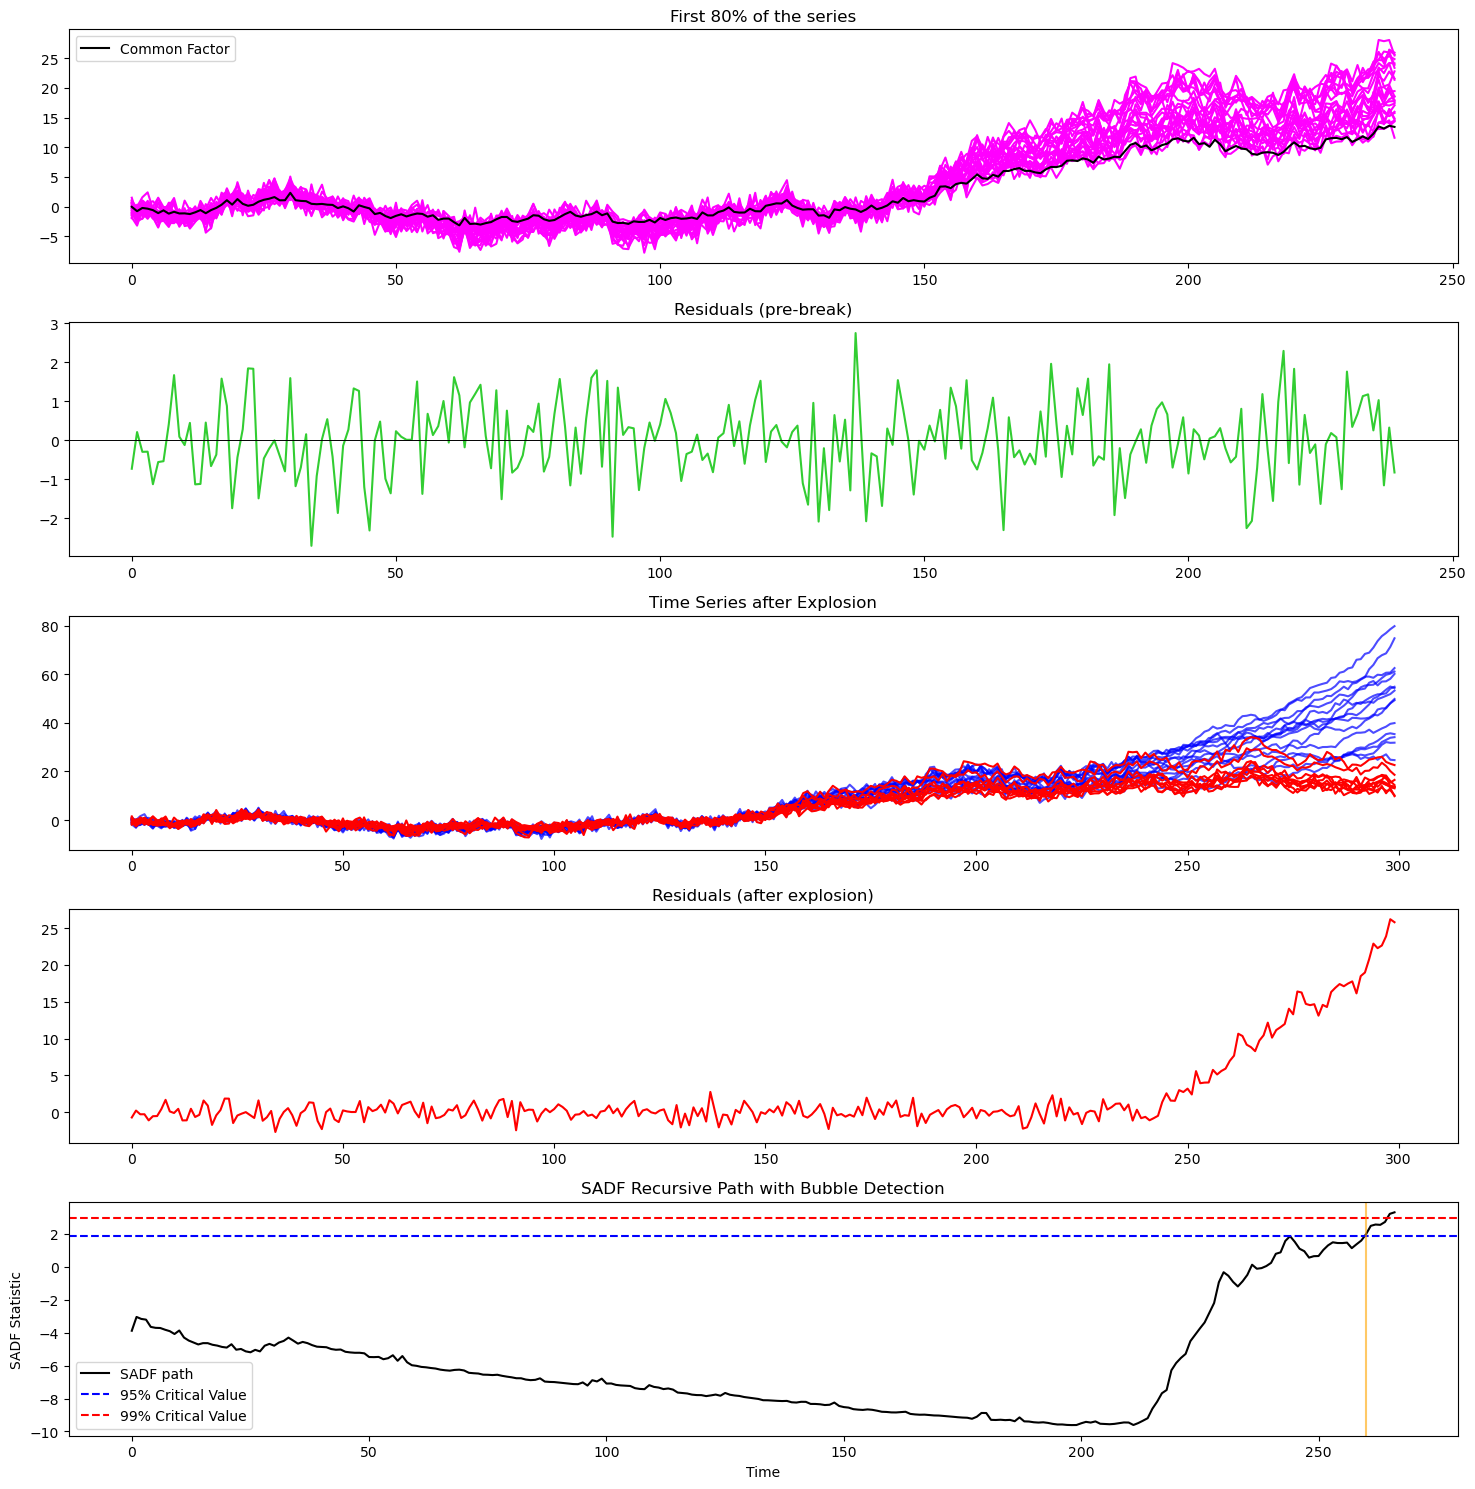

Time series is Explosive. SADF Value is: 3.3

Bubble starts at t=260
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [49]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 500

In [51]:
T = 500
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [52]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

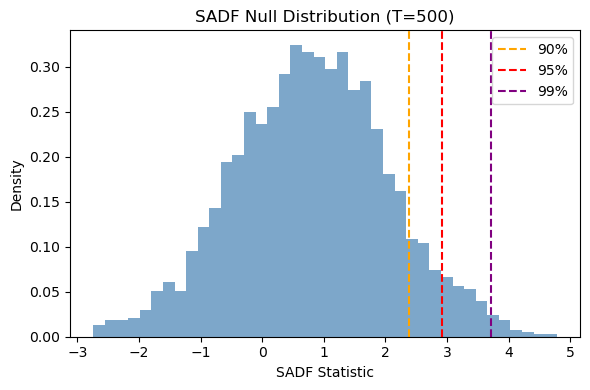

     Critical Value
90%        2.387373
95%        2.922190
99%        3.720351


beta =  [ 0.02982093  0.02886061 -0.04607787  0.04440953  0.1272613  -0.03053078
  0.08072452 -0.03253288  0.15224977 -0.00723917  0.03598627  0.01292386
  0.01238836  0.02716934 -0.0243334   0.10120712  0.0995509  -0.02974639
  0.15279876  0.14718262  0.07601878 -0.01374267  0.04534481  0.04588692]
alpha =  0.1096
ADF on residuals  stat = -14.439


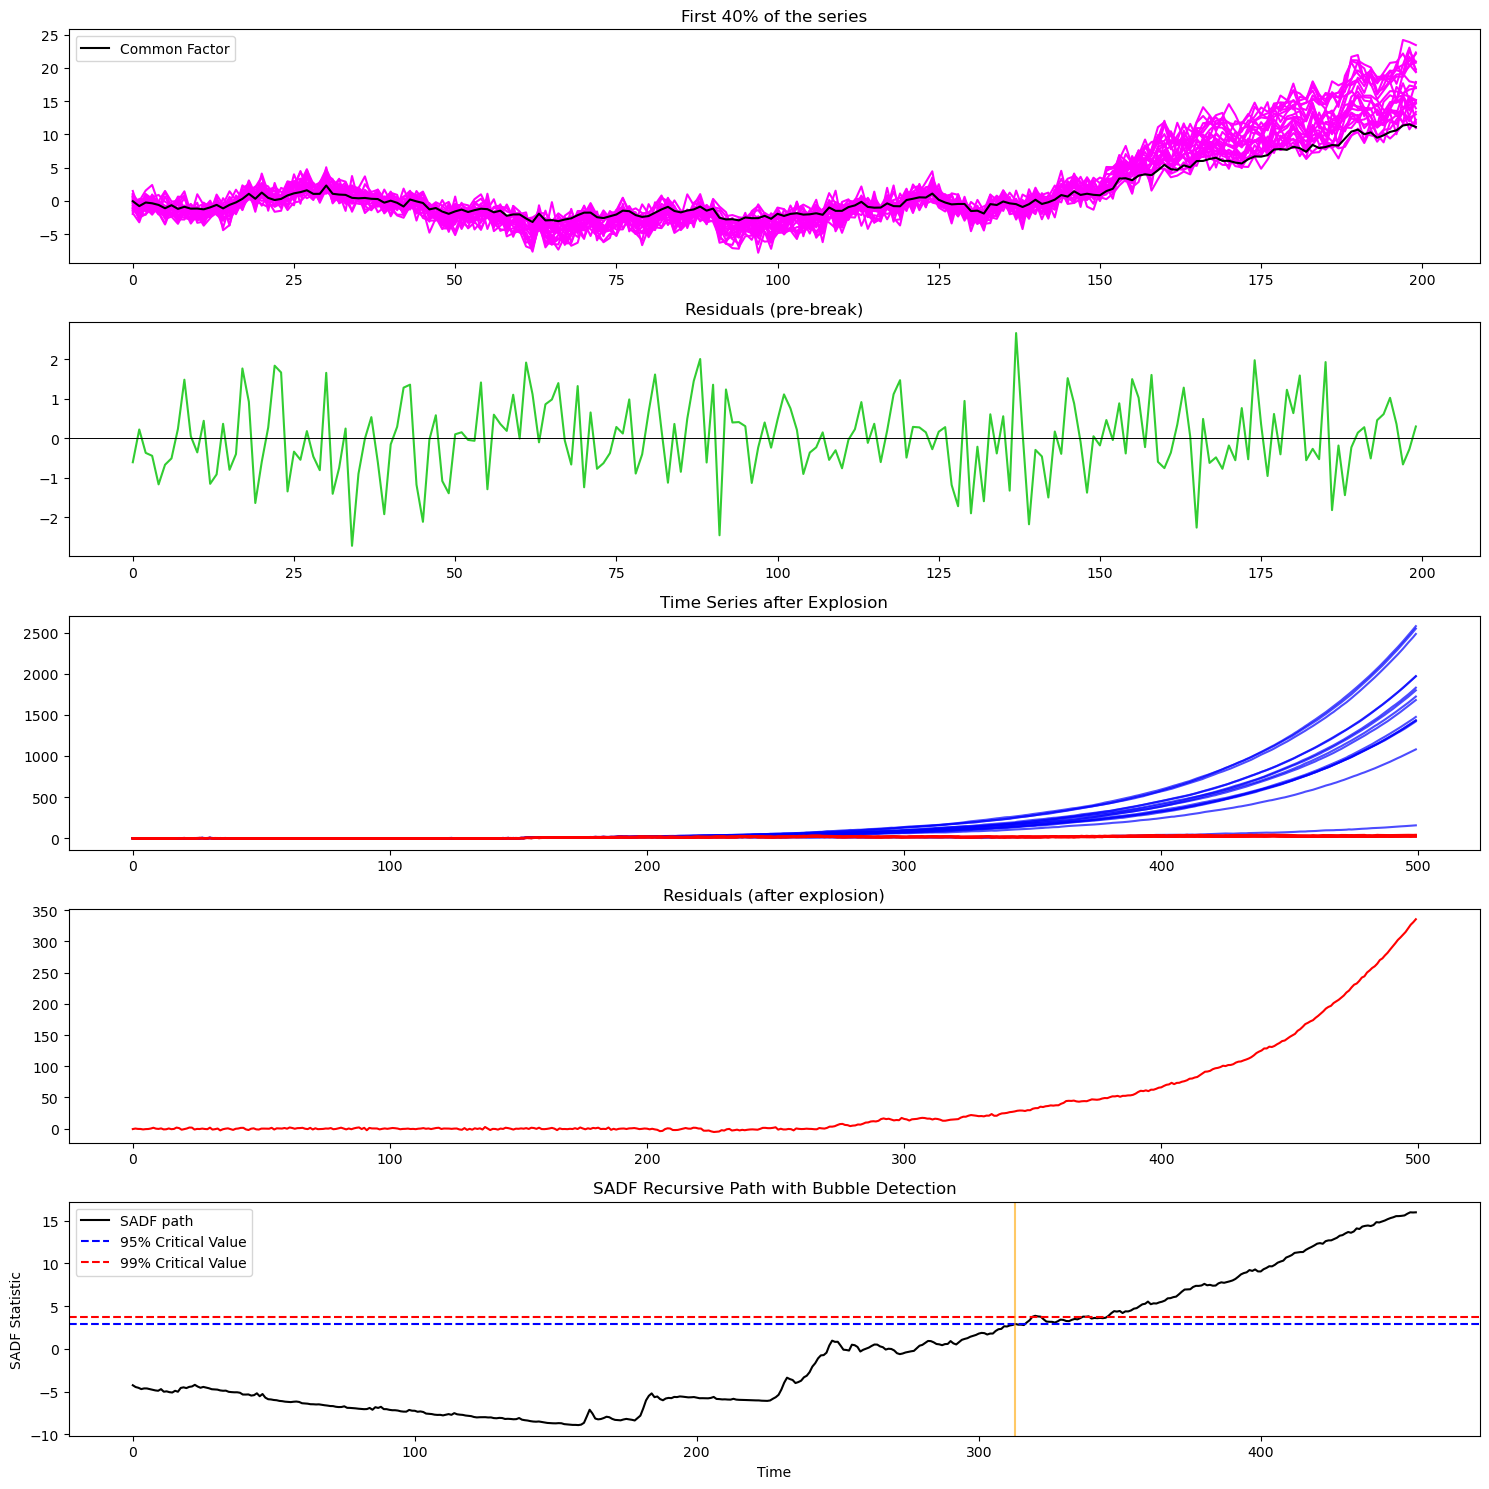

Time series is Explosive. SADF Value is: 15.98

Bubble starts at t=313
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [53]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

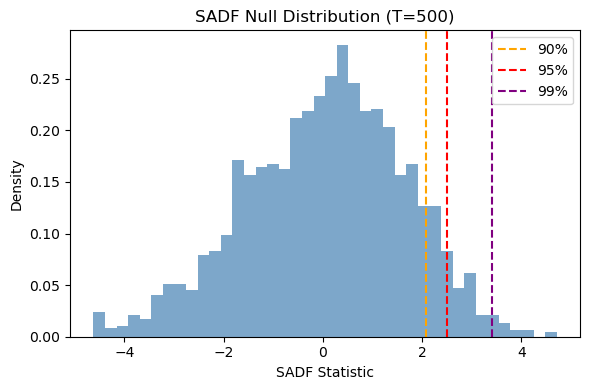

     Critical Value
90%        2.080424
95%        2.492048
99%        3.402806


beta =  [ 0.0228038   0.06987934 -0.03795529  0.04999863  0.0874021   0.02610376
  0.10306238  0.02687918  0.10908213 -0.06360196 -0.02173568  0.04296052
  0.00748346  0.03481964 -0.06851257  0.08350038  0.12796324 -0.03582732
  0.15273436  0.17656767  0.12482468 -0.00546764  0.0426877  -0.00046023]
alpha =  0.0895
ADF on residuals  stat = -17.832


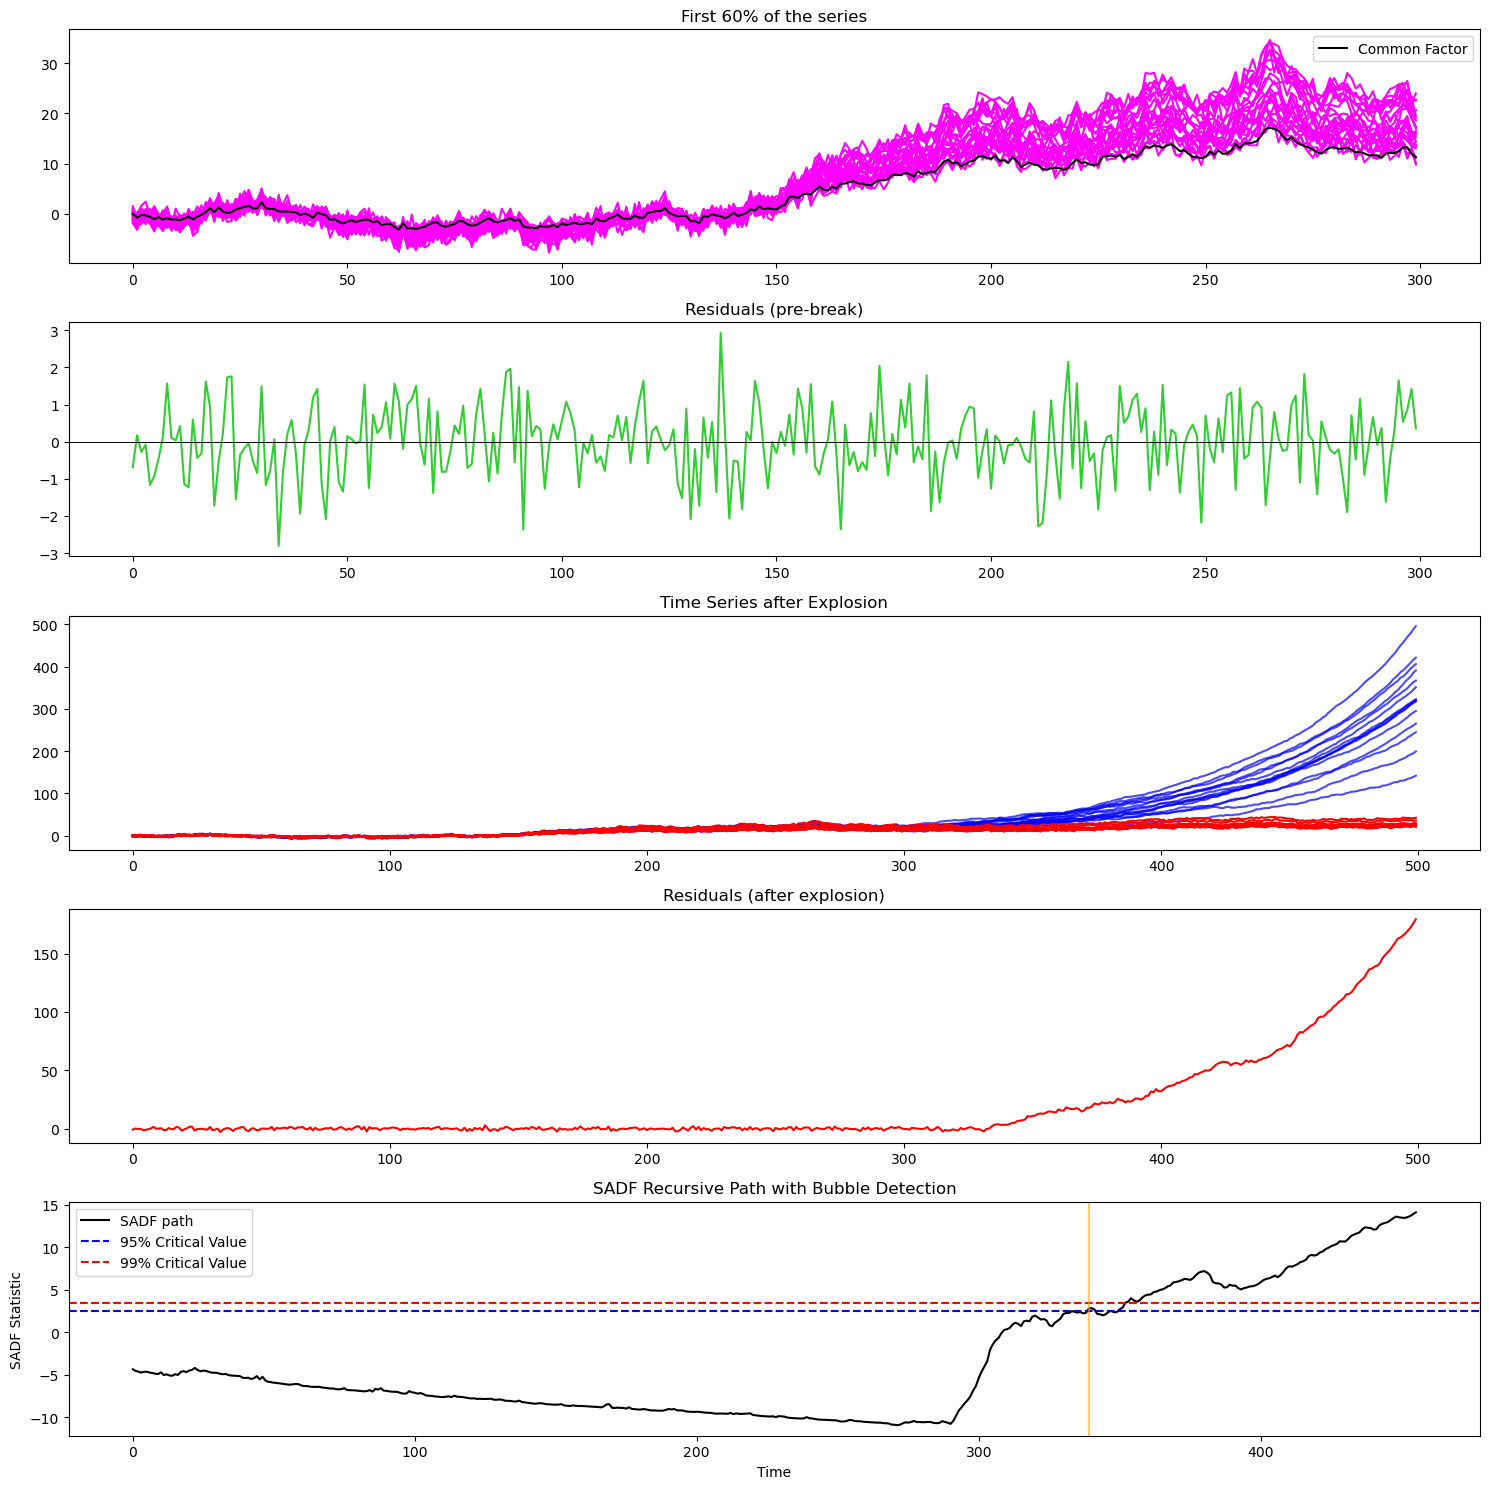

Time series is Explosive. SADF Value is: 14.1

Bubble starts at t=339
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [54]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

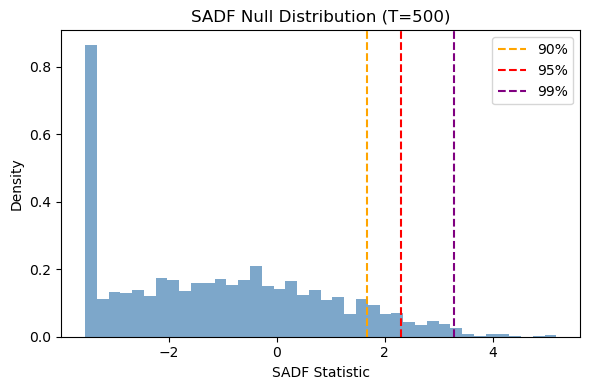

     Critical Value
90%        1.679730
95%        2.305386
99%        3.292753


beta =  [ 0.03183547  0.08366187 -0.01120039  0.05410067  0.06855996  0.00848357
  0.06480128  0.07690572  0.10113649 -0.00715644 -0.01560493  0.01096492
 -0.00612209  0.01076161 -0.01444325  0.06628771  0.15212065 -0.07139145
  0.11253058  0.1587408   0.12573623 -0.02956765  0.09288288  0.00593676]
alpha =  0.0719
ADF on residuals  stat = -20.791


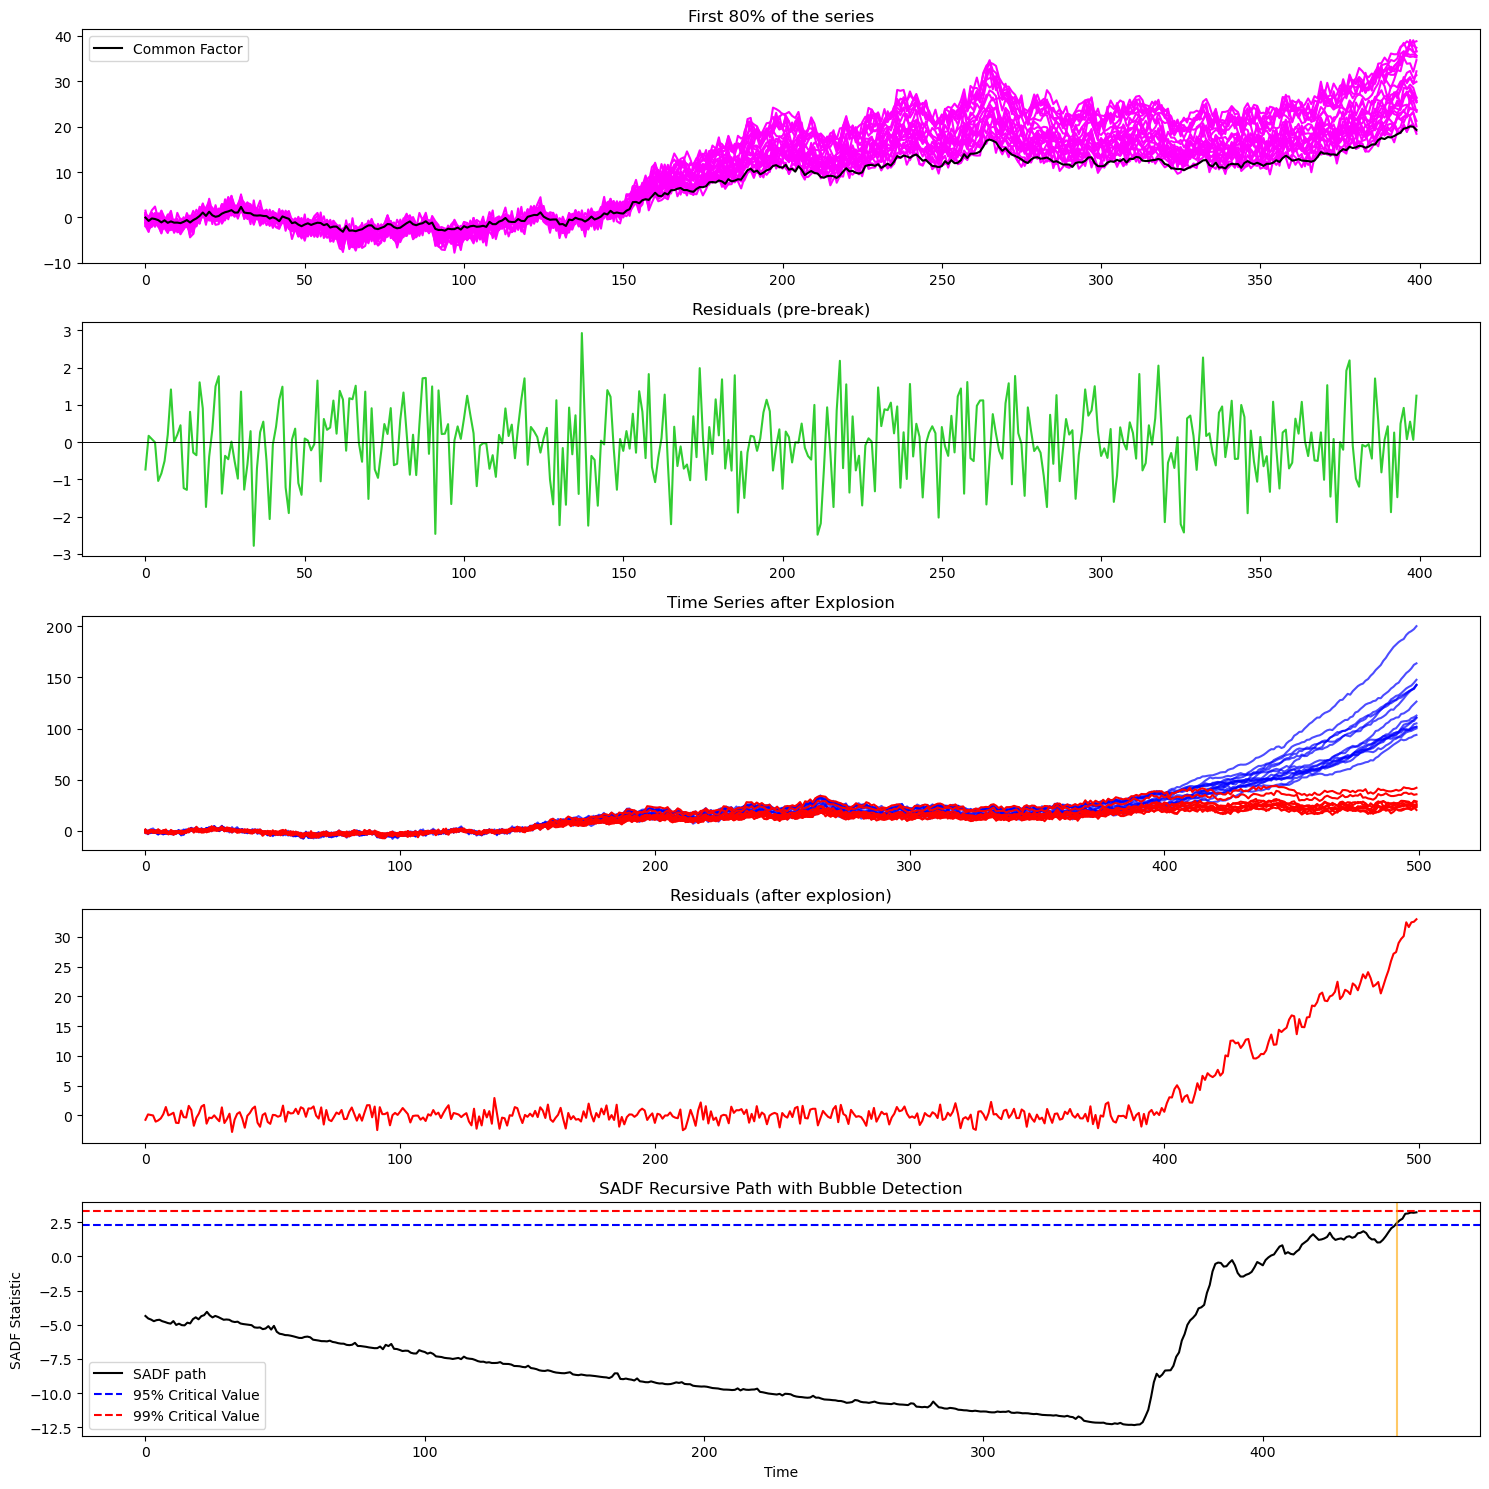

Time series is Explosive. SADF Value is: 3.22

Bubble starts at t=448
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [55]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 800

In [57]:
T = 800
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [58]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

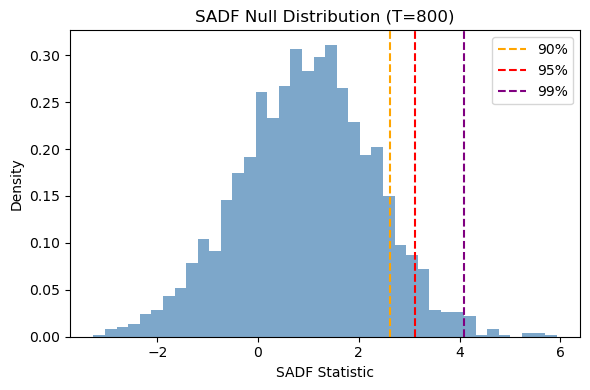

     Critical Value
90%        2.627759
95%        3.117528
99%        4.093738


beta =  [ 0.02515269  0.04135317 -0.04388427  0.03857005  0.08620533  0.02660783
  0.10578641  0.02759866  0.11524373 -0.04994418 -0.02597332  0.0511684
  0.0016243   0.02500786 -0.05212593  0.08029939  0.13076821 -0.03735353
  0.16594198  0.17191574  0.14388264 -0.00334161  0.03729729 -0.0027831 ]
alpha =  0.0888
ADF on residuals  stat = -18.392


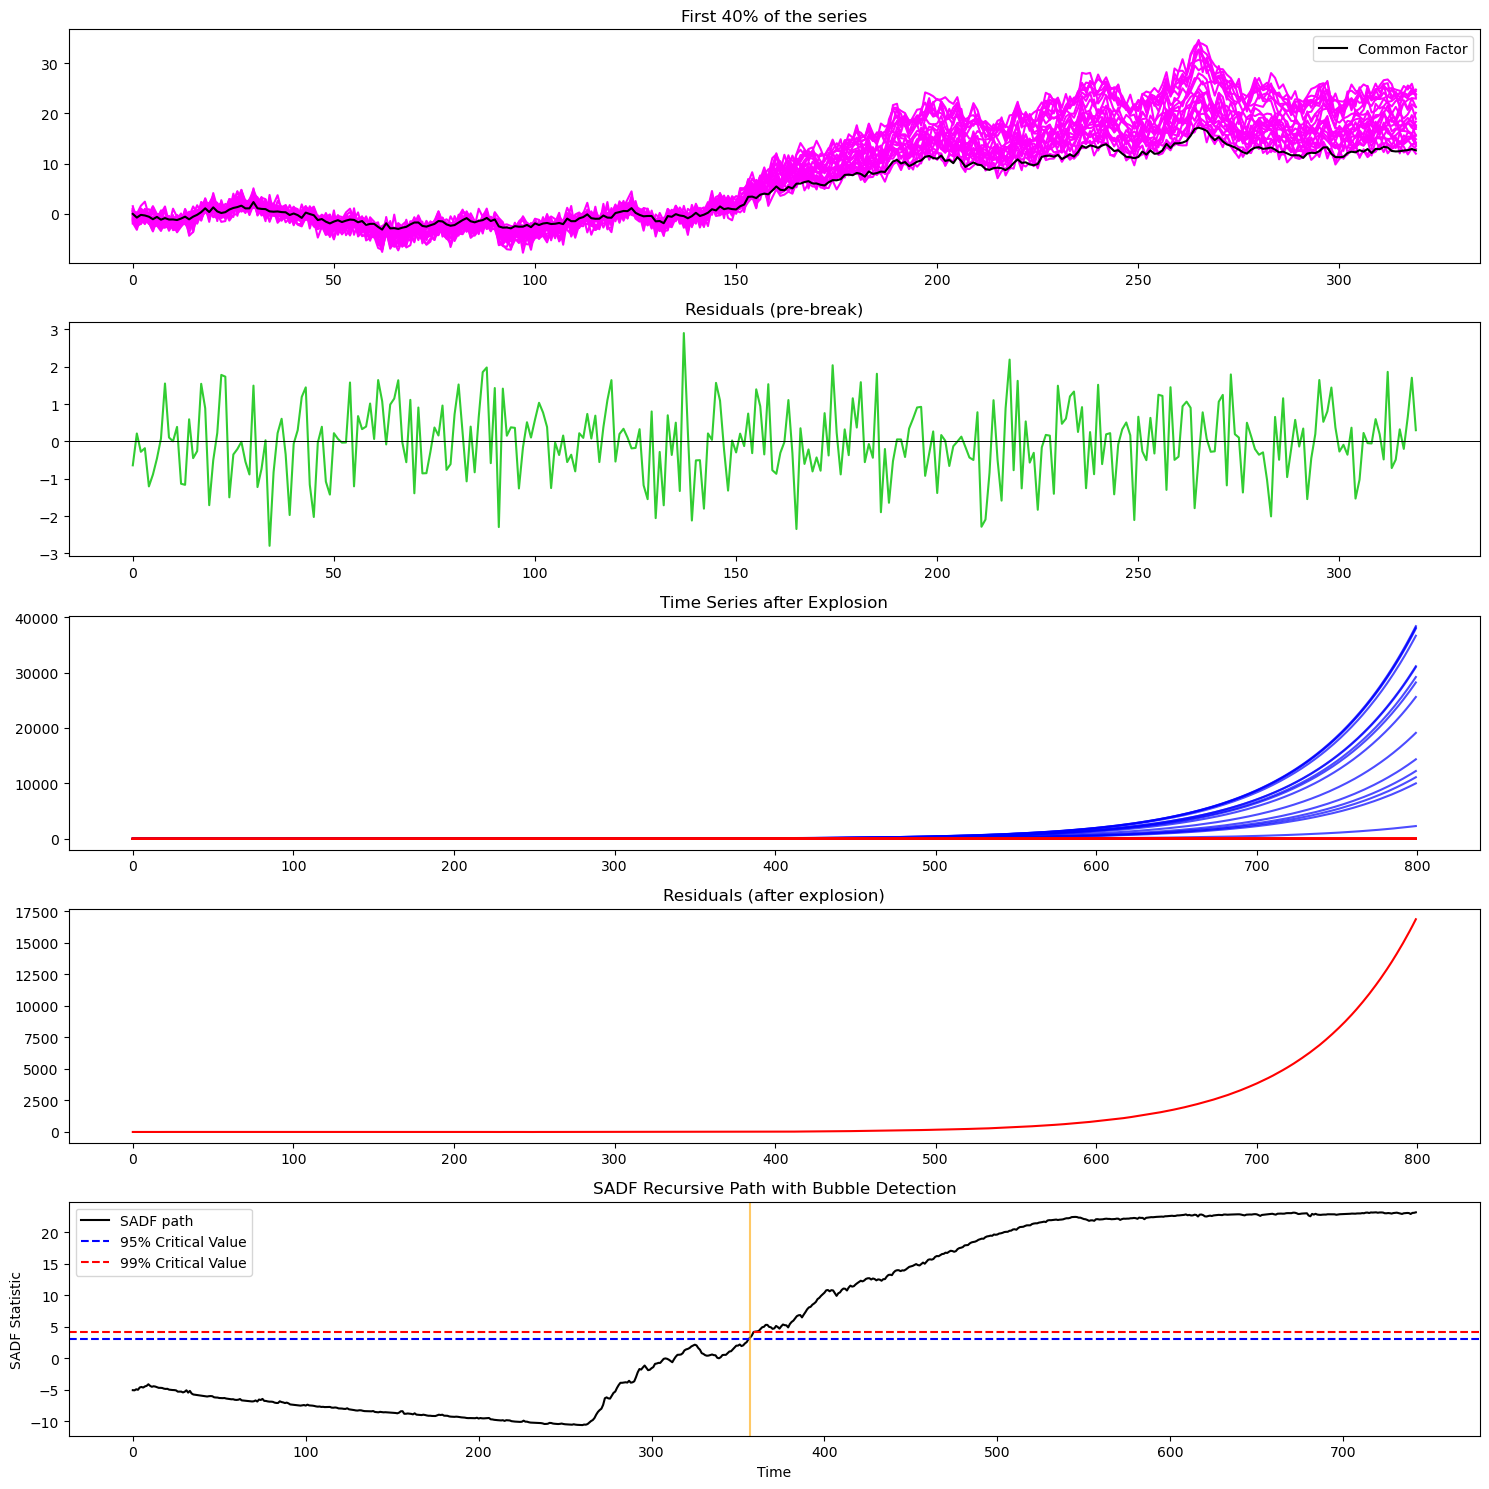

Time series is Explosive. SADF Value is: 23.18

Bubble starts at t=357
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [59]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution_gpu(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

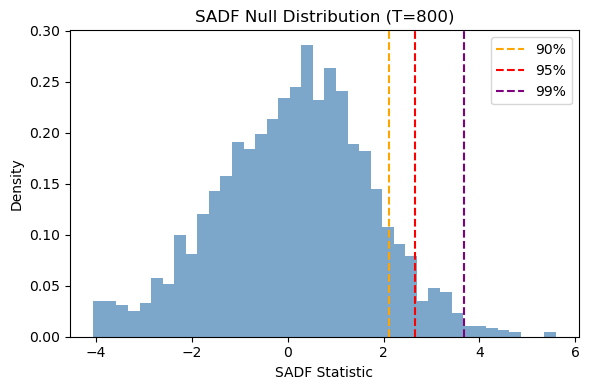

     Critical Value
90%        2.103748
95%        2.661422
99%        3.667822


beta =  [ 0.01647116  0.0811813   0.02849015  0.06502956  0.06427577 -0.00508109
  0.05272805  0.10364216  0.07381454  0.00327075  0.02364881  0.0274456
 -0.00772555 -0.00796613  0.00798962  0.05132353  0.10575038 -0.05636723
  0.10686955  0.12838079  0.08865787  0.01166697  0.05953157 -0.01612798]
alpha =  0.0753
ADF on residuals  stat = -23.472


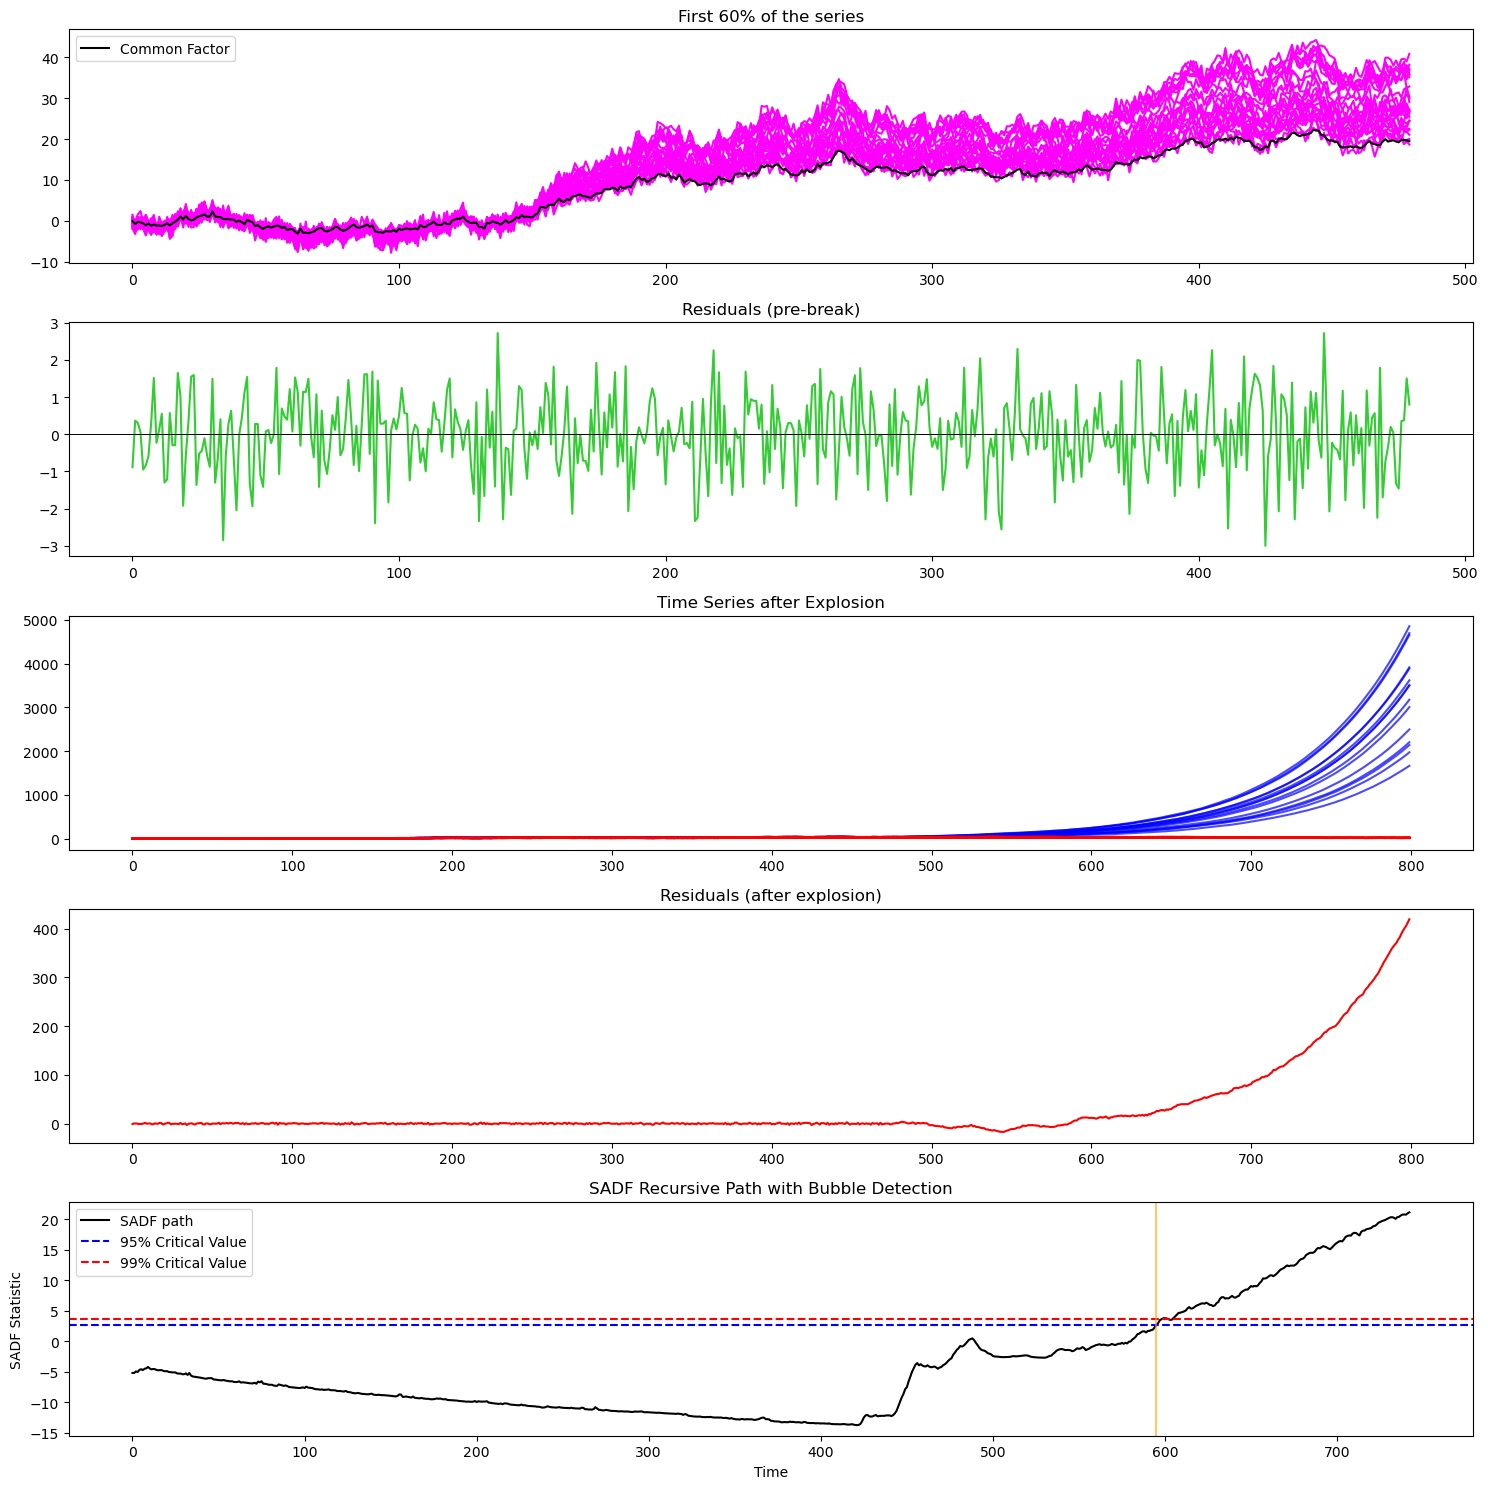

Time series is Explosive. SADF Value is: 21.14

Bubble starts at t=595
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [71]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

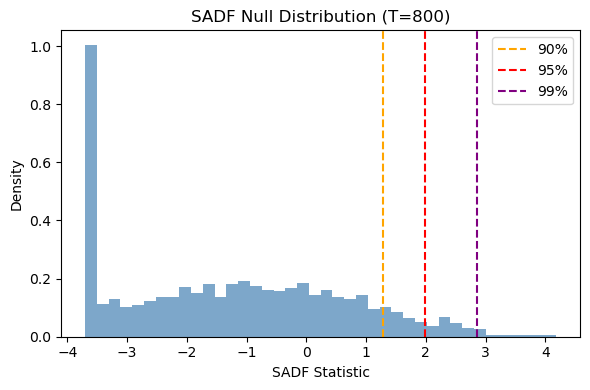

     Critical Value
90%        1.281963
95%        1.989318
99%        2.854765


beta =  [ 0.02743914  0.10493521  0.04077929  0.06777947  0.05943862  0.01263494
  0.03781343  0.08315703  0.07578736  0.01237333  0.04805391  0.01998375
  0.02595616  0.00260597 -0.01692988  0.06296514  0.1072616  -0.06386828
  0.08763918  0.11735427  0.06466077 -0.00376009  0.02931752  0.00274129]
alpha =  0.0806
ADF on residuals  stat = -26.967


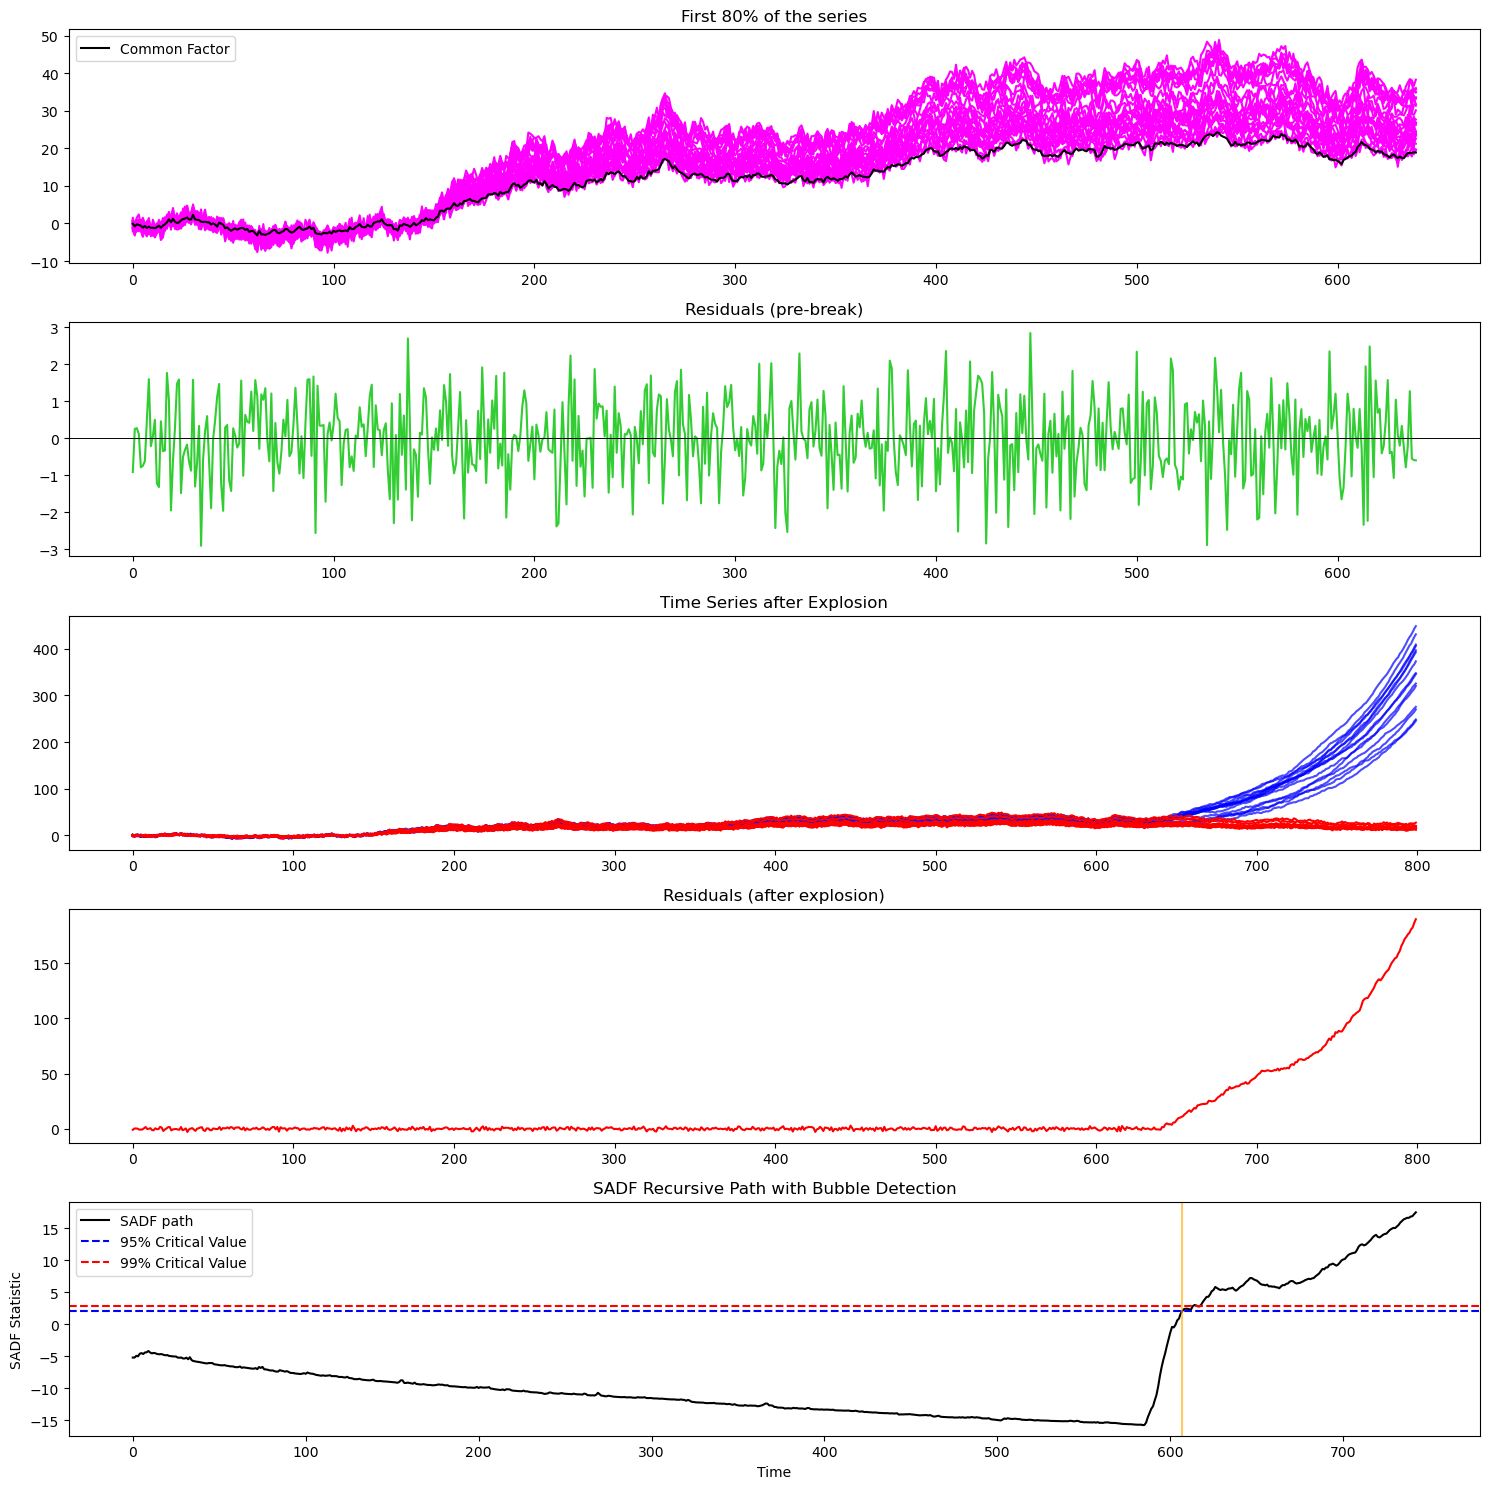

Time series is Explosive. SADF Value is: 17.46

Bubble starts at t=607
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [72]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 1000

In [73]:
T = 1000
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [74]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

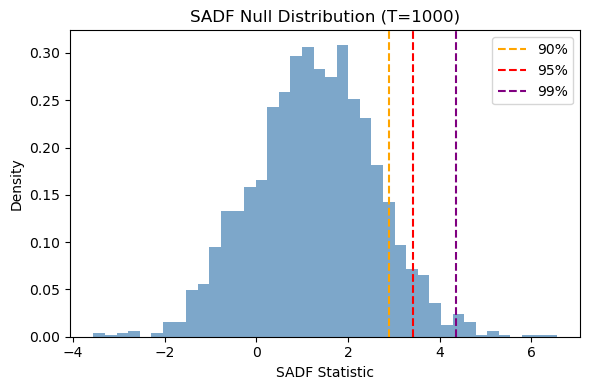

     Critical Value
90%        2.893881
95%        3.415356
99%        4.361196


beta =  [ 0.03183547  0.08366187 -0.01120039  0.05410067  0.06855996  0.00848357
  0.06480128  0.07690572  0.10113649 -0.00715644 -0.01560493  0.01096492
 -0.00612209  0.01076161 -0.01444325  0.06628771  0.15212065 -0.07139145
  0.11253058  0.1587408   0.12573623 -0.02956765  0.09288288  0.00593676]
alpha =  0.0719
ADF on residuals  stat = -20.791


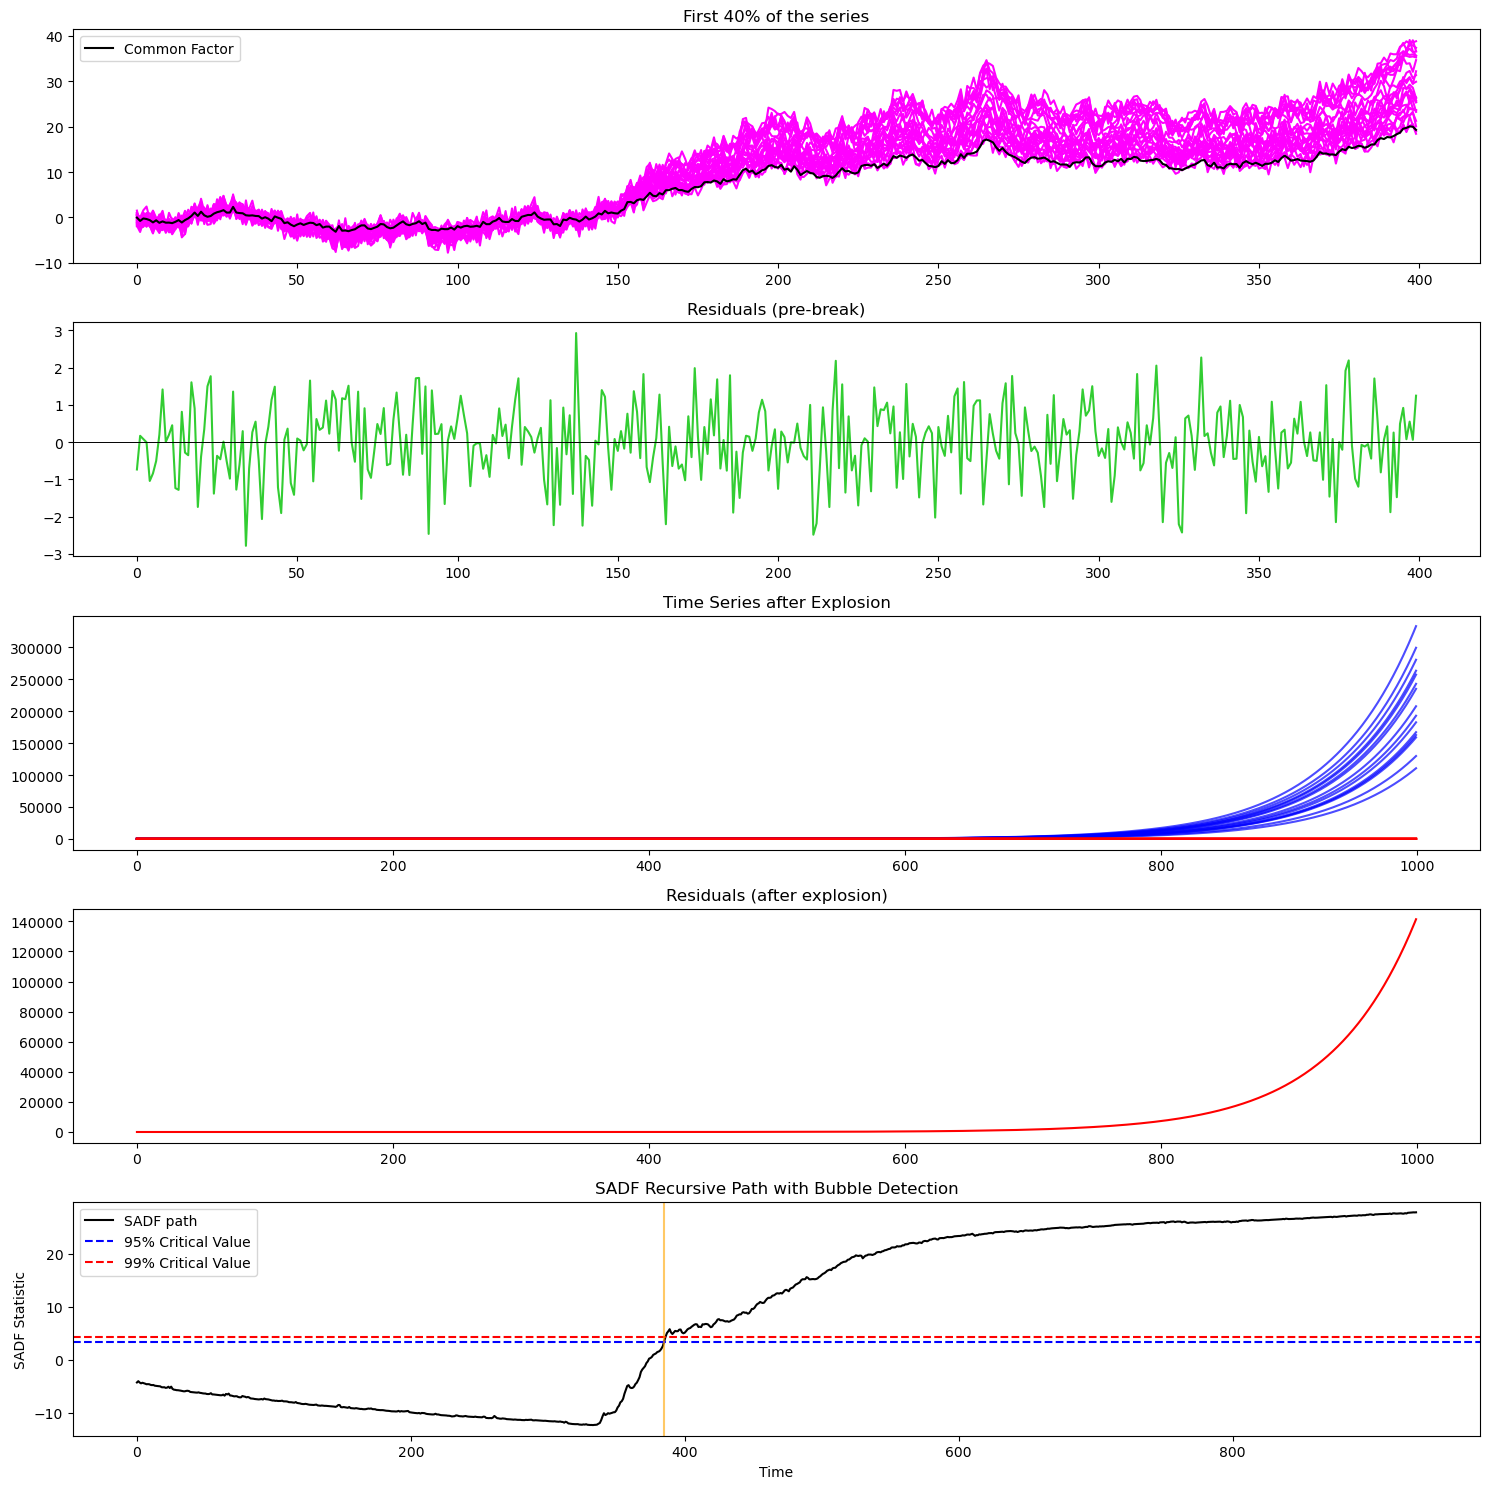

Time series is Explosive. SADF Value is: 27.78

Bubble starts at t=385
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [75]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

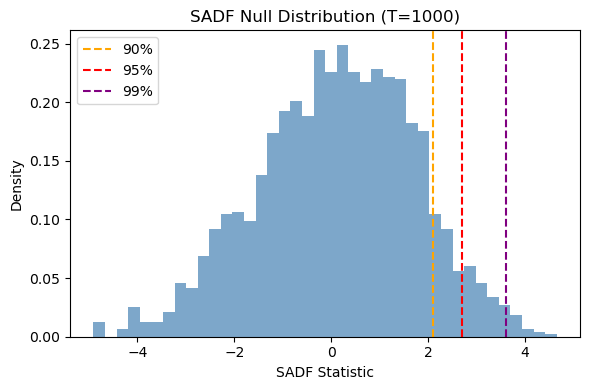

     Critical Value
90%        2.097816
95%        2.700986
99%        3.596881


beta =  [ 0.03091912  0.10115154  0.03125589  0.05952047  0.06448745  0.01294609
  0.04670838  0.06803679  0.07641561  0.00976331  0.04660952  0.03582969
  0.01071069 -0.00404352 -0.00464319  0.06706342  0.11601034 -0.08476375
  0.09428142  0.12216701  0.09279526 -0.00514666  0.02974349  0.00202224]
alpha =  0.0837
ADF on residuals  stat = -25.801


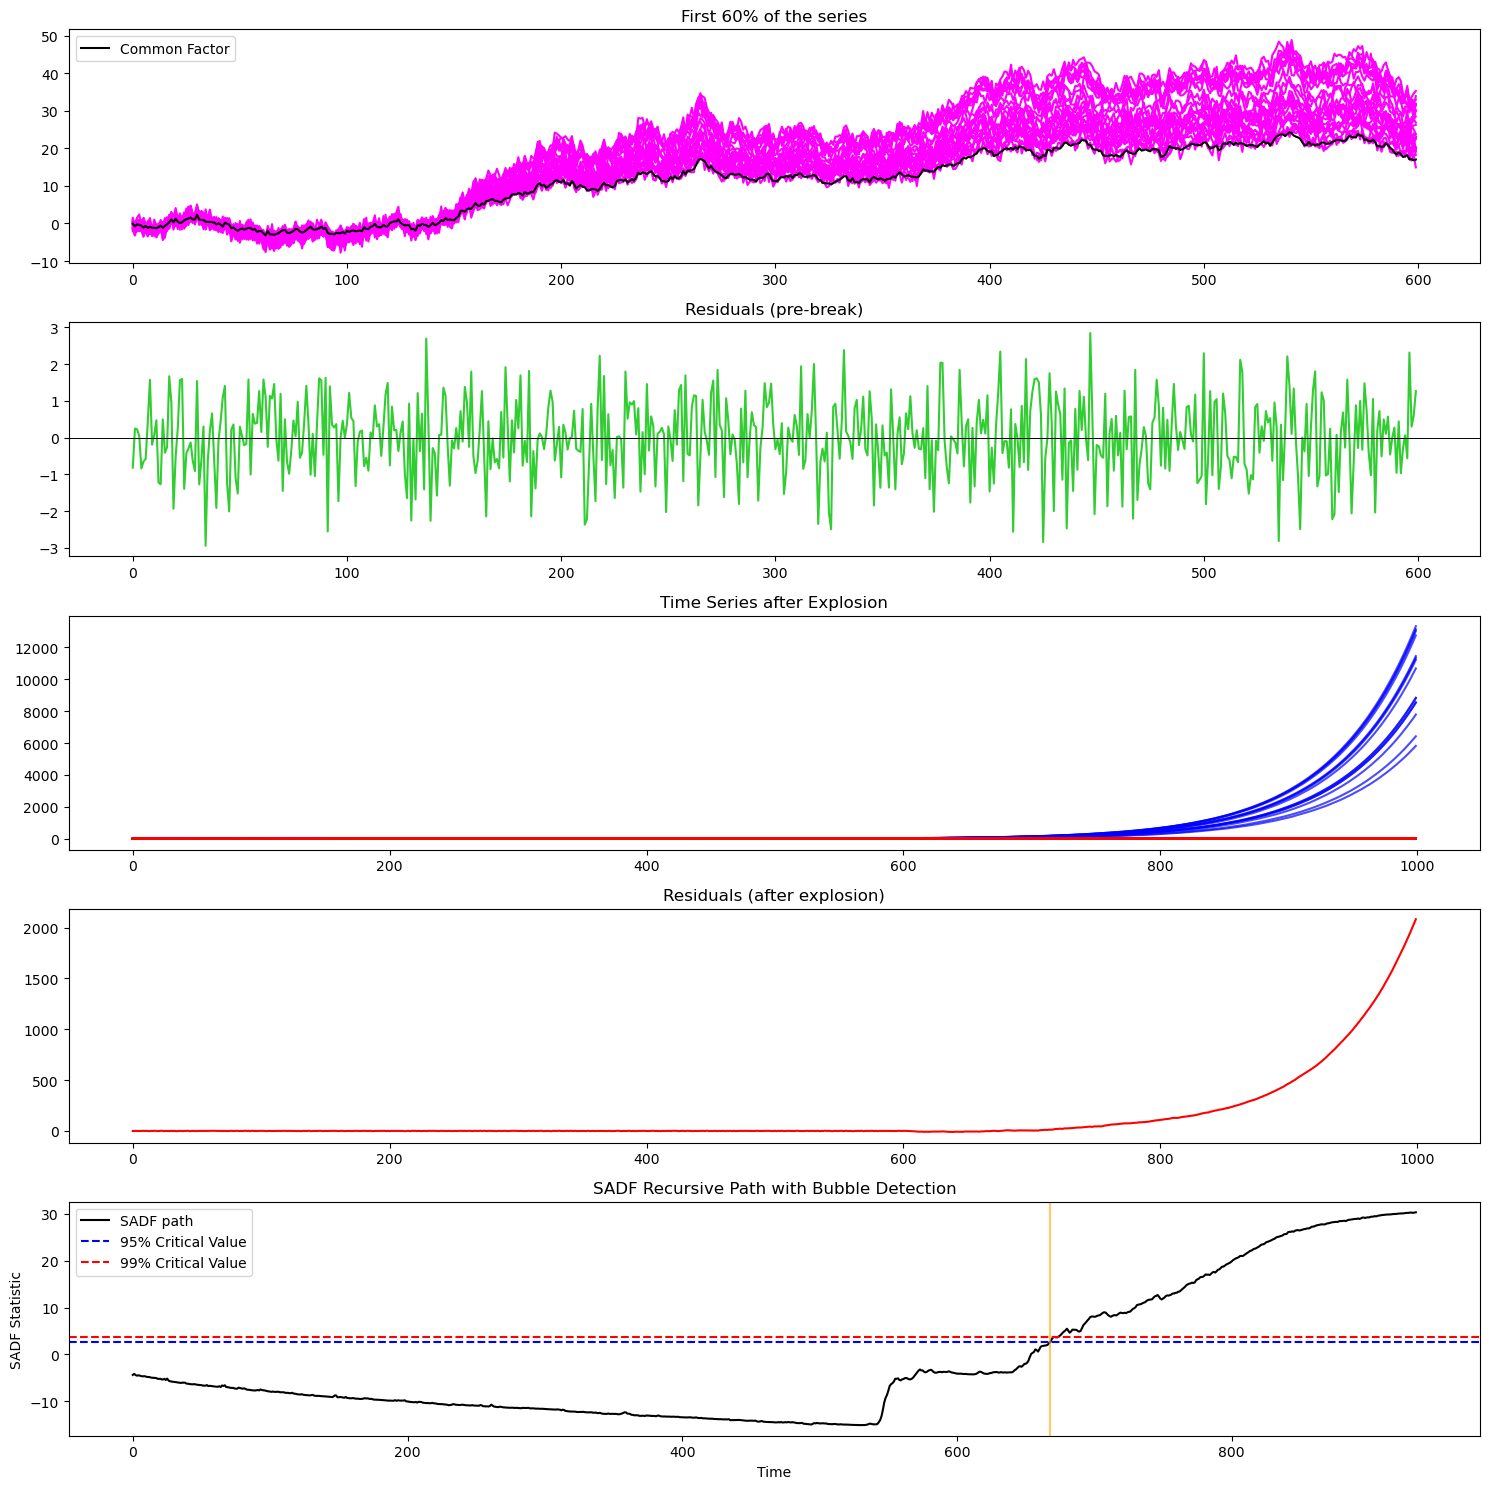

Time series is Explosive. SADF Value is: 30.35

Bubble starts at t=668
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [76]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

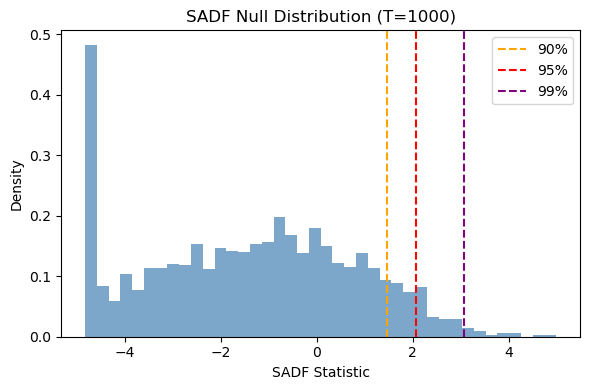

     Critical Value
90%        1.473529
95%        2.065635
99%        3.062675


beta =  [ 0.02756299  0.08168911  0.04570252  0.0851056   0.06088119  0.0122832
  0.03116893  0.0723169   0.08447467  0.02783306  0.03935434  0.02113454
  0.04262339  0.00332888 -0.011474    0.0533636   0.10508457 -0.06624295
  0.08103359  0.11407254  0.03020949  0.0117946   0.02881386  0.00899272]
alpha =  0.076
ADF on residuals  stat = -30.049


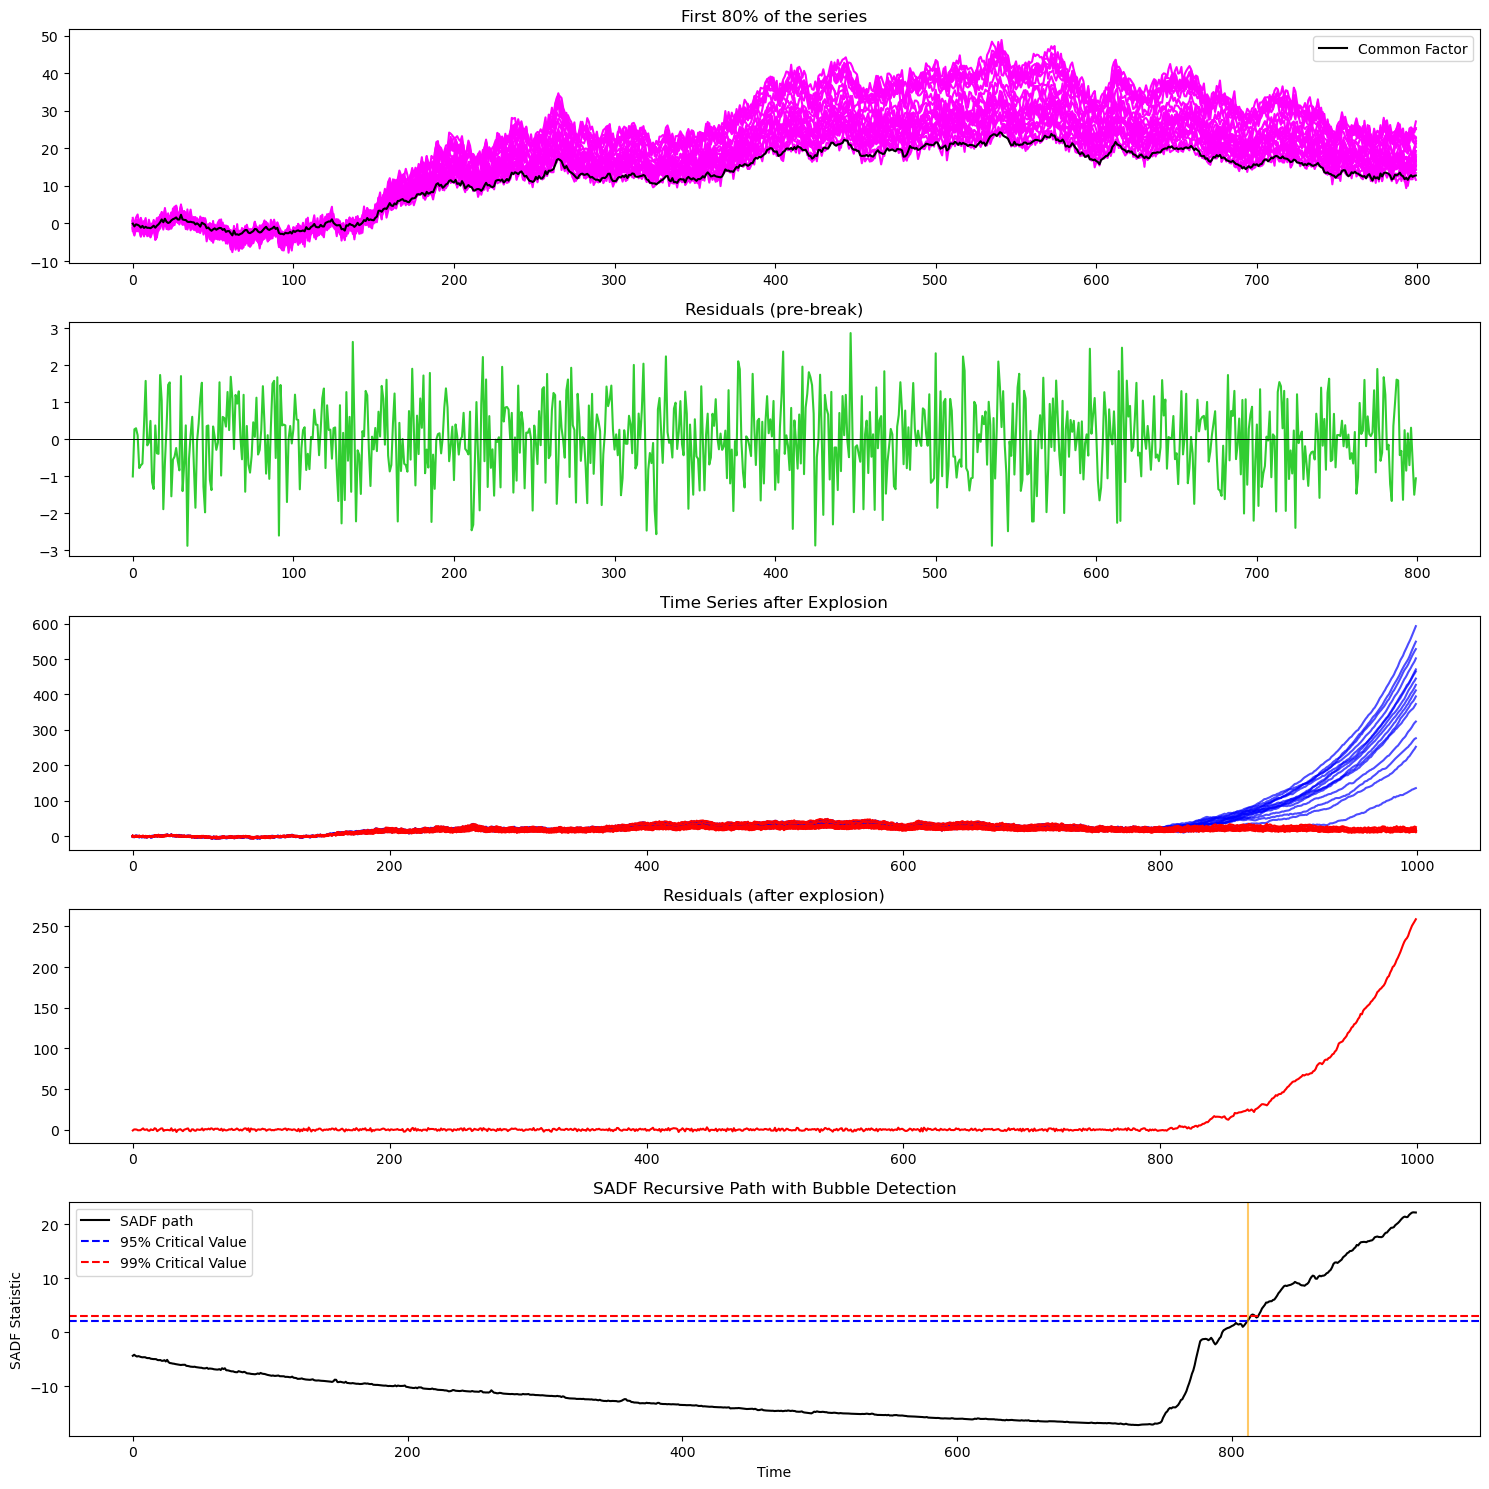

Time series is Explosive. SADF Value is: 22.21

Bubble starts at t=812
Multipliers: [1.497 1.076 1.415 1.311 1.554 1.912 1.214 1.396 1.893 1.316 1.849 1.832
 1.611 1.846 1.809 1.161 1.186 1.017 1.143 1.721 1.376 1.234 1.995 1.364
 1.009]


In [80]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val =mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [81]:

# Create the DataFrame and write to CSV
pd.DataFrame({
    'T': T_list,
    'num_series': num_series_list,
    'coint_frac': coint_frac_list,
    'num_of_rw': num_of_rw_list,
    'SADF': SADF_list,
    'crit_95': crit_95_list,
    'crit_99': crit_99_list
}).to_csv(str(num_series) + "_Series_Experiment.csv", index=False)


import sounddevice as sd
fs = 50100  # sample rate
t = np.linspace(0, 2, fs, False)             # 1 second
sd.play(np.sin(2 * np.pi * 440 * t) * 0.5, fs)  # 440 Hz at half volume
sd.wait()
np.random.seed(22)